In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_percentage_error
import math 
from sklearn.linear_model import Ridge

In [2]:
def label(df, t=15):
#     df = df[df.shape[0] % t:]
    df2 = df.groupby(np.arange(len(df))//t, axis=0).agg({'Timestamp': 'min', 'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last',
                                'N/A': 'sum', 'Timestamp End': 'max', 'N/A.1': 'sum', 'N/A.2': 'sum', 'N/A.3': 'sum',
                                'N/A.4': 'sum', 'N/A.5': 'sum', 'Time_UTC_Start': 'first'})
    df2.rename(columns = {'N/A': 'Volumn', 'N/A.1': 'Quote_asset_volume', 'N/A.2': 'Number_of_trades',
                         'N/A.3': 'Taker_buy_base_asset_volume', 'N/A.4': 'Taker_buy_quote_asset_volume'}, inplace = True)
    length = df2.shape[0]
    op = df2['Open'].values.reshape(length,1)
    cl = df2['Close'].values.reshape(length,1 )
    v = np.ones((length, 1)) * (op < cl)
    df2['label'] = v
    df2.index = df2["Timestamp"]
    df2.drop(columns=["Timestamp", "N/A.5"], inplace=True)
    return df2

In [3]:
df = pd.read_csv('../binance-BTCUSDT-1m.csv')

In [4]:
df = df.iloc[26:]

In [5]:
df

,Timestamp,Open,High,Low,Close,N/A,Timestamp End,N/A.1,N/A.2,N/A.3,N/A.4,N/A.5,Time_UTC_Start
26,1531911600000,7403.62,7409.77,7400.74,7405.01,35.159664,1531911659999,2.603868e+05,229,16.229202,1.201946e+05,0,2018-07-18 11:00:00
27,1531911660000,7408.91,7415.00,7405.01,7410.47,32.509643,1531911719999,2.409011e+05,235,21.383195,1.584533e+05,0,2018-07-18 11:01:00
28,1531911720000,7410.47,7419.09,7407.99,7414.82,44.223166,1531911779999,3.278453e+05,319,20.739173,1.537723e+05,0,2018-07-18 11:02:00
29,1531911780000,7415.66,7417.80,7402.63,7412.80,27.717196,1531911839999,2.054896e+05,255,9.337587,6.924374e+04,0,2018-07-18 11:03:00
30,1531911840000,7410.00,7410.00,7401.53,7410.00,28.737819,1531911899999,2.127669e+05,160,19.774747,1.464004e+05,0,2018-07-18 11:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1651909740000,35920.00,35923.50,35913.03,35913.04,12.096760,1651909799999,4.345057e+05,388,7.151330,2.568724e+05,0,2022-05-07 07:49:00
1999996,1651909800000,35913.04,35922.47,35913.03,35922.46,24.311140,1651909859999,8.731911e+05,575,9.917070,3.561851e+05,0,2022-05-07 07:50:00
1999997,1651909860000,35922.46,35950.19,35922.46,35940.01,72.302490,1651909919999,2.598789e+06,782,32.884100,1.181822e+06,0,2022-05-07 07:51:00
1999998,1651909920000,35940.01,35956.51,35940.00,35956.51,44.738440,1651909979999,1.608394e+06,517,38.371650,1.379504e+06,0,2022-05-07 07:52:00


In [6]:
df = label(df, t=60)

In [7]:
df

,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,Time_UTC_Start,label
Timestamp,,,,,,,,,,,,
1531911600000,7403.62,7433.58,7388.97,7419.00,1509.897532,1531915199999,1.119392e+07,9140,858.531816,6.365466e+06,2018-07-18 11:00:00,1.0
1531915200000,7418.02,7472.02,7406.23,7435.89,2149.661062,1531918799999,1.600977e+07,11665,1215.708096,9.052893e+06,2018-07-18 12:00:00,1.0
1531918800000,7435.90,7469.37,7386.12,7457.01,2197.764754,1531922399999,1.633053e+07,12232,1095.080446,8.138991e+06,2018-07-18 13:00:00,1.0
1531922400000,7458.14,7531.30,7431.66,7453.00,3276.014892,1531925999999,2.446673e+07,17154,1741.566330,1.300958e+07,2018-07-18 14:00:00,0.0
1531926000000,7451.71,7453.01,7360.40,7428.73,2447.162973,1531929599999,1.813955e+07,13956,1175.701436,8.715964e+06,2018-07-18 15:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1651892400000,35953.63,35959.99,35760.00,35812.21,950.370320,1651895999999,3.407918e+07,23893,440.466220,1.579364e+07,2022-05-07 03:00:00,0.0
1651896000000,35812.22,35882.67,35725.72,35746.63,1038.354640,1651899599999,3.717972e+07,25448,505.470370,1.809844e+07,2022-05-07 04:00:00,0.0
1651899600000,35746.62,35900.00,35722.24,35898.95,897.235930,1651903199999,3.215497e+07,22906,428.196080,1.534393e+07,2022-05-07 05:00:00,1.0


In [7]:
df_label = pd.read_csv('./new_label.csv')

In [8]:
df_label = df_label.rename(columns={'label':'new_label'})

In [9]:
df_label

,Time_UTC_Start,new_label
0,2018-07-19 11:39:00,0
1,2018-07-19 12:39:00,1
2,2018-07-19 13:39:00,1
3,2018-07-19 14:39:00,0
4,2018-07-19 15:39:00,0
...,...,...
33304,2022-05-07 03:39:00,0
33305,2022-05-07 04:39:00,0
33306,2022-05-07 05:39:00,0
33307,2022-05-07 06:39:00,0


In [10]:
df = df_label.merge(df, how='left', on='Time_UTC_Start')

In [11]:
df

,Time_UTC_Start,new_label,Open,High,Low,Close,Volumn,Timestamp End,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,label
0,2018-07-19 11:39:00,0,7376.07,7449.96,7374.39,7421.86,2089.455262,1.532004e+12,1.549932e+07,11170.0,1061.254371,7.873135e+06,1.0
1,2018-07-19 12:39:00,1,7422.10,7491.29,7416.14,7476.00,2503.435824,1.532008e+12,1.864360e+07,13841.0,1566.110620,1.166464e+07,1.0
2,2018-07-19 13:39:00,1,7476.00,7521.86,7435.05,7460.77,2828.531733,1.532011e+12,2.112726e+07,14906.0,1534.280510,1.146082e+07,0.0
3,2018-07-19 14:39:00,0,7460.77,7491.57,7380.00,7394.32,2064.560674,1.532015e+12,1.541043e+07,11528.0,907.501465,6.774638e+06,0.0
4,2018-07-19 15:39:00,0,7397.96,7431.19,7373.25,7406.95,2923.943374,1.532018e+12,2.164442e+07,12951.0,1518.376834,1.124020e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33304,2022-05-07 03:39:00,0,35823.05,35895.61,35755.85,35814.49,970.311790,1.651898e+12,3.476291e+07,23856.0,482.353610,1.727962e+07,0.0
33305,2022-05-07 04:39:00,0,35814.49,35897.44,35722.24,35821.68,989.732570,1.651902e+12,3.544653e+07,24154.0,445.450930,1.595071e+07,1.0
33306,2022-05-07 05:39:00,0,35821.69,35909.75,35794.31,35858.19,814.217850,1.651906e+12,2.919114e+07,22472.0,409.742390,1.468973e+07,1.0
33307,2022-05-07 06:39:00,0,35858.19,35912.00,35790.02,35902.74,1330.810940,1.651909e+12,4.768683e+07,24694.0,552.020890,1.978468e+07,1.0


In [8]:
df.index = df['Time_UTC_Start']

In [9]:
del df['Timestamp End'], df['Time_UTC_Start']

In [10]:
df['Open_change'] = df['Open'] - df['Open'].shift(1)
df['High_change'] = df['High'] - df['High'].shift(1)
df['Low_change'] = df['Low'] - df['Low'].shift(1)
df['Close_change'] = df['Close'] - df['Close'].shift(1)
df = df.dropna()

In [11]:
df

,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,label,Open_change,High_change,Low_change,Close_change
Time_UTC_Start,,,,,,,,,,,,,,
2018-07-18 12:00:00,7418.02,7472.02,7406.23,7435.89,2149.661062,1.600977e+07,11665,1215.708096,9.052893e+06,1.0,14.40,38.44,17.26,16.89
2018-07-18 13:00:00,7435.90,7469.37,7386.12,7457.01,2197.764754,1.633053e+07,12232,1095.080446,8.138991e+06,1.0,17.88,-2.65,-20.11,21.12
2018-07-18 14:00:00,7458.14,7531.30,7431.66,7453.00,3276.014892,2.446673e+07,17154,1741.566330,1.300958e+07,0.0,22.24,61.93,45.54,-4.01
2018-07-18 15:00:00,7451.71,7453.01,7360.40,7428.73,2447.162973,1.813955e+07,13956,1175.701436,8.715964e+06,0.0,-6.43,-78.29,-71.26,-24.27
2018-07-18 16:00:00,7428.46,7462.00,7415.32,7435.00,2002.579947,1.489915e+07,11347,1048.602977,7.801609e+06,1.0,-23.25,8.99,54.92,6.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,35953.63,35959.99,35760.00,35812.21,950.370320,3.407918e+07,23893,440.466220,1.579364e+07,0.0,-63.43,-70.01,-176.28,-141.43
2022-05-07 04:00:00,35812.22,35882.67,35725.72,35746.63,1038.354640,3.717972e+07,25448,505.470370,1.809844e+07,0.0,-141.41,-77.32,-34.28,-65.58
2022-05-07 05:00:00,35746.62,35900.00,35722.24,35898.95,897.235930,3.215497e+07,22906,428.196080,1.534393e+07,1.0,-65.60,17.33,-3.48,152.32


In [12]:
df['Close_change'].shift(1).rolling(3).agg({"min_close":'min', 'max_close':'max'})

,min_close,max_close
Time_UTC_Start,,
2018-07-18 12:00:00,NaN,NaN
2018-07-18 13:00:00,NaN,NaN
2018-07-18 14:00:00,NaN,NaN
2018-07-18 15:00:00,-4.01,21.12
2018-07-18 16:00:00,-24.27,21.12
...,...,...
2022-05-07 03:00:00,-63.41,21.12
2022-05-07 04:00:00,-141.43,21.12
2022-05-07 05:00:00,-141.43,-63.41


In [13]:
df['Close_change']

Time_UTC_Start
2018-07-18 12:00:00     16.89
2018-07-18 13:00:00     21.12
2018-07-18 14:00:00     -4.01
2018-07-18 15:00:00    -24.27
2018-07-18 16:00:00      6.27
                        ...  
2022-05-07 03:00:00   -141.43
2022-05-07 04:00:00    -65.58
2022-05-07 05:00:00    152.32
2022-05-07 06:00:00    -92.68
2022-05-07 07:00:00    145.42
Name: Close_change, Length: 33332, dtype: float64

In [14]:
base_cols = list(df.columns)

In [15]:
base_cols

['Open',
 'High',
 'Low',
 'Close',
 'Volumn',
 'Quote_asset_volume',
 'Number_of_trades',
 'Taker_buy_base_asset_volume',
 'Taker_buy_quote_asset_volume',
 'label',
 'Open_change',
 'High_change',
 'Low_change',
 'Close_change']

In [16]:
base_cols = base_cols[5:]

In [17]:
base_cols.remove('label')

In [18]:
import gc
def base_feat(df, base_cols=[], 
                  time_delta=1, 
                  window_lookback=[1, 5, 10, 60, 200],
                  agg_func=['min', 'max', 'mean', 'median', 'var']):
    """
    This func use for create formal features base on a list of columns
    Params:
        df (Pandas DF): dataframe input
        base_cols (list): list of columns you want to create feature by this function
        time_delta (int): time between 2 records (minutes)
        window_lookback (list): list of integer time the time_delta. For example time_delta = 15 window_lookback = [1, 2]
                                so the time lookback is 15 minutes and 15*2=30 minutes
        agg_func (list): aggregate func you use for rolling
    """
        
    for col in base_cols:
        for lookback in window_lookback:
            dict_agg_func = {'_'.join([agg, col, str(time_delta * lookback) + 'M']): agg for agg in agg_func}
            print(dict_agg_func)
            df_feat = df[col].shift(1).rolling(lookback).agg(dict_agg_func)
            df = pd.concat([df, df_feat], axis=1)
            del df_feat
            gc.collect()
    for col in df.columns:
        if str(time_delta) in col and 'var' in col:
            del df[col]
    df = df.dropna()
    return df

In [19]:
df_feat = base_feat(df, time_delta=60, base_cols=base_cols)

{'min_Quote_asset_volume_60M': 'min', 'max_Quote_asset_volume_60M': 'max', 'mean_Quote_asset_volume_60M': 'mean', 'median_Quote_asset_volume_60M': 'median', 'var_Quote_asset_volume_60M': 'var'}
{'min_Quote_asset_volume_300M': 'min', 'max_Quote_asset_volume_300M': 'max', 'mean_Quote_asset_volume_300M': 'mean', 'median_Quote_asset_volume_300M': 'median', 'var_Quote_asset_volume_300M': 'var'}
{'min_Quote_asset_volume_600M': 'min', 'max_Quote_asset_volume_600M': 'max', 'mean_Quote_asset_volume_600M': 'mean', 'median_Quote_asset_volume_600M': 'median', 'var_Quote_asset_volume_600M': 'var'}
{'min_Quote_asset_volume_3600M': 'min', 'max_Quote_asset_volume_3600M': 'max', 'mean_Quote_asset_volume_3600M': 'mean', 'median_Quote_asset_volume_3600M': 'median', 'var_Quote_asset_volume_3600M': 'var'}
{'min_Quote_asset_volume_12000M': 'min', 'max_Quote_asset_volume_12000M': 'max', 'mean_Quote_asset_volume_12000M': 'mean', 'median_Quote_asset_volume_12000M': 'median', 'var_Quote_asset_volume_12000M': 'v

In [20]:
df_feat

,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,label,...,median_Close_change_600M,min_Close_change_3600M,max_Close_change_3600M,mean_Close_change_3600M,median_Close_change_3600M,min_Close_change_12000M,max_Close_change_12000M,mean_Close_change_12000M,median_Close_change_12000M,var_Close_change_12000M
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-26 20:00:00,8261.10,8299.08,8118.02,8145.72,2538.278252,2.086387e+07,13209,1319.258433,1.084160e+07,0.0,...,6.840,-97.71,119.55,3.887833,7.645,-165.01,132.94,4.22635,6.320,1857.644868
2018-07-26 21:00:00,8145.72,8159.99,7914.00,7972.30,7465.444975,5.996988e+07,36160,3172.928840,2.549350e+07,0.0,...,-5.055,-118.55,119.55,2.569833,7.645,-165.01,132.94,3.54915,5.925,1932.126999
2018-07-26 22:00:00,7972.30,8057.11,7912.03,7915.00,3599.830176,2.871459e+07,18199,1840.147242,1.468130e+07,0.0,...,-5.055,-173.42,119.55,-0.877667,6.385,-173.42,132.94,2.57645,5.475,2087.001955
2018-07-26 23:00:00,7917.00,7958.21,7850.06,7920.00,4105.981315,3.244956e+07,19303,1930.956664,1.526536e+07,1.0,...,-6.010,-173.42,113.48,-3.825167,2.705,-173.42,132.94,2.31000,5.475,2104.728632
2018-07-27 00:00:00,7920.00,7963.94,7891.24,7908.77,1845.983649,1.462198e+07,9043,1001.334300,7.932613e+06,0.0,...,5.185,-173.42,98.94,-5.633167,2.520,-173.42,132.94,2.45635,5.475,2101.193235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,35953.63,35959.99,35760.00,35812.21,950.370320,3.407918e+07,23893,440.466220,1.579364e+07,0.0,...,17.825,-1299.33,631.78,-47.209500,-23.615,-1299.33,631.78,-20.64840,-25.855,41883.336252
2022-05-07 04:00:00,35812.22,35882.67,35725.72,35746.63,1038.354640,3.717972e+07,25448,505.470370,1.809844e+07,0.0,...,17.825,-1299.33,631.78,-52.683167,-27.530,-1299.33,631.78,-20.85780,-25.855,41925.315964
2022-05-07 05:00:00,35746.62,35900.00,35722.24,35898.95,897.235930,3.215497e+07,22906,428.196080,1.534393e+07,1.0,...,-1.655,-1299.33,631.78,-57.389333,-30.150,-1299.33,631.78,-20.61685,-25.855,41891.927958


In [21]:
feat = df_feat.columns[14:]

In [22]:
df_feat.shape

(33132, 190)

In [23]:
feat

Index(['min_Quote_asset_volume_60M', 'max_Quote_asset_volume_60M',
       'mean_Quote_asset_volume_60M', 'median_Quote_asset_volume_60M',
       'min_Quote_asset_volume_300M', 'max_Quote_asset_volume_300M',
       'mean_Quote_asset_volume_300M', 'median_Quote_asset_volume_300M',
       'var_Quote_asset_volume_300M', 'min_Quote_asset_volume_600M',
       ...
       'median_Close_change_600M', 'min_Close_change_3600M',
       'max_Close_change_3600M', 'mean_Close_change_3600M',
       'median_Close_change_3600M', 'min_Close_change_12000M',
       'max_Close_change_12000M', 'mean_Close_change_12000M',
       'median_Close_change_12000M', 'var_Close_change_12000M'],
      dtype='object', length=176)

# Test features

In [24]:
for f in feat:
    scaler = preprocessing.StandardScaler()
    df_feat[f] = scaler.fit_transform(df_feat[[f]])

In [25]:
df_feat

,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,label,...,median_Close_change_600M,min_Close_change_3600M,max_Close_change_3600M,mean_Close_change_3600M,median_Close_change_3600M,min_Close_change_12000M,max_Close_change_12000M,mean_Close_change_12000M,median_Close_change_12000M,var_Close_change_12000M
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-26 20:00:00,8261.10,8299.08,8118.02,8145.72,2538.278252,2.086387e+07,13209,1319.258433,1.084160e+07,0.0,...,0.082818,0.70172,-0.672697,0.105943,0.213602,0.742546,-0.794061,0.210178,0.306507,-0.584328
2018-07-26 21:00:00,8145.72,8159.99,7914.00,7972.30,7465.444975,5.996988e+07,36160,3172.928840,2.549350e+07,0.0,...,-0.097994,0.66372,-0.672697,0.059557,0.213602,0.742546,-0.794061,0.167137,0.278075,-0.583483
2018-07-26 22:00:00,7972.30,8057.11,7912.03,7915.00,3599.830176,2.871459e+07,18199,1840.147242,1.468130e+07,0.0,...,-0.097994,0.56367,-0.672697,-0.061775,0.161946,0.731077,-0.794061,0.105315,0.245685,-0.581728
2018-07-26 23:00:00,7917.00,7958.21,7850.06,7920.00,4105.981315,3.244956e+07,19303,1930.956664,1.526536e+07,1.0,...,-0.112511,0.56367,-0.684273,-0.165510,0.011076,0.731077,-0.794061,0.088380,0.245685,-0.581527
2018-07-27 00:00:00,7920.00,7963.94,7891.24,7908.77,1845.983649,1.462198e+07,9043,1001.334300,7.932613e+06,0.0,...,0.057661,0.56367,-0.712001,-0.229140,0.003491,0.731077,-0.794061,0.097682,0.245685,-0.581567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,35953.63,35959.99,35760.00,35812.21,950.370320,3.407918e+07,23893,440.466220,1.579364e+07,0.0,...,0.249798,-1.48931,0.304155,-1.692382,-1.067973,-0.804418,-0.067629,-1.370791,-2.009394,-0.130666
2022-05-07 04:00:00,35812.22,35882.67,35725.72,35746.63,1038.354640,3.717972e+07,25448,505.470370,1.809844e+07,0.0,...,0.249798,-1.48931,0.304155,-1.885023,-1.228478,-0.804418,-0.067629,-1.384100,-2.009394,-0.130190
2022-05-07 05:00:00,35746.62,35900.00,35722.24,35898.95,897.235930,3.215497e+07,22906,428.196080,1.534393e+07,1.0,...,-0.046312,-1.48931,0.304155,-2.050652,-1.335891,-0.804418,-0.067629,-1.368786,-2.009394,-0.130569


### train test split

In [109]:
X, y = df_feat[feat], df_feat['new_label']
X_train, X_valid, X_test = X[:int(df_feat.shape[0]*0.7)], X[int(df_feat.shape[0]*0.7):int(df_feat.shape[0]*0.85)], X[int(df_feat.shape[0]*0.85):]
y_train, y_valid, y_test = y[:int(df_feat.shape[0]*0.7)], y[int(df_feat.shape[0]*0.7):int(df_feat.shape[0]*0.85)], y[int(df_feat.shape[0]*0.85):]

## logistic model


In [78]:
from sklearn.linear_model import LogisticRegression

In [164]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.1, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=1234, solver='lbfgs', max_iter=100, multi_class='auto', verbose=1)

In [165]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


LogisticRegression(C=0.1, random_state=1234, verbose=1)

In [166]:
y_pred_val = clf.predict_proba(X_valid)

In [167]:
y_pred_val = y_pred_val[:, 1]

(array([681., 237., 165., 115., 116., 109.,  86.,  84.,  81.,  61.,  59.,
         46.,  48.,  40.,  45.,  49.,  46.,  50.,  43.,  64.,  34.,  38.,
         65.,  41.,  54.,  42.,  47.,  44.,  50.,  35.,  48.,  54.,  50.,
         52.,  31.,  58.,  52.,  62.,  59.,  75.,  78.,  79.,  84.,  69.,
         87., 114., 121., 160., 202., 665.]),
 array([3.82919776e-10, 1.99999972e-02, 3.99999940e-02, 5.99999909e-02,
        7.99999877e-02, 9.99999845e-02, 1.19999981e-01, 1.39999978e-01,
        1.59999975e-01, 1.79999972e-01, 1.99999969e-01, 2.19999966e-01,
        2.39999962e-01, 2.59999959e-01, 2.79999956e-01, 2.99999953e-01,
        3.19999950e-01, 3.39999946e-01, 3.59999943e-01, 3.79999940e-01,
        3.99999937e-01, 4.19999934e-01, 4.39999931e-01, 4.59999927e-01,
        4.79999924e-01, 4.99999921e-01, 5.19999918e-01, 5.39999915e-01,
        5.59999912e-01, 5.79999908e-01, 5.99999905e-01, 6.19999902e-01,
        6.39999899e-01, 6.59999896e-01, 6.79999893e-01, 6.99999889e-01,
        7.

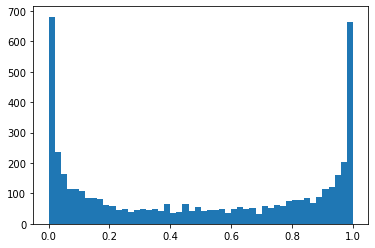

In [168]:
plt.hist(y_pred_val, bins=50)

In [169]:
roc_auc_score(y_test, y_pred_val)

0.47024600497748803

In [117]:
X_train

,min_Volumn_75M,max_Volumn_75M,mean_Volumn_75M,median_Volumn_75M,var_Volumn_75M,min_Volumn_150M,max_Volumn_150M,mean_Volumn_150M,median_Volumn_150M,min_Volumn_900M,...,min_Close_change_3000M,max_Close_change_3000M,mean_Close_change_3000M,median_Close_change_3000M,var_Close_change_3000M,min_Close_change_7500M,max_Close_change_7500M,mean_Close_change_7500M,median_Close_change_7500M,var_Close_change_7500M
513,0.701227,0.852359,0.838981,0.592278,0.152200,0.382346,0.457161,0.296612,0.156309,0.166627,...,0.620565,-0.702275,-0.532311,-0.554940,-0.569559,0.628894,-0.626810,-0.297912,-0.607443,-0.624311
514,0.405999,0.852359,0.757589,0.592278,0.221863,0.382346,0.457161,0.305045,0.156309,0.166627,...,0.620565,-0.702275,-0.552518,-0.560697,-0.569471,0.628894,-0.626810,-0.306176,-0.607443,-0.624252
515,-0.077070,0.315319,0.171737,0.026463,-0.035835,0.186200,0.457161,0.295431,0.156309,0.166627,...,0.620565,-0.702275,-0.522875,-0.554940,-0.569667,0.628894,-0.626810,-0.302018,-0.607443,-0.624240
516,-0.077070,0.315319,0.029516,-0.160329,-0.029737,0.186200,0.457161,0.312796,0.156309,0.166627,...,0.620565,-0.702275,-0.524730,-0.554940,-0.569666,0.628894,-0.626810,-0.304409,-0.619120,-0.624238
517,-0.077070,-0.481407,-0.323551,-0.186785,-0.252895,0.186200,0.457161,0.269874,0.005815,0.166627,...,0.620565,-0.702275,-0.533921,-0.554940,-0.569778,0.628894,-0.626810,-0.304652,-0.619120,-0.624239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23502,0.484597,-0.337209,-0.021545,0.181092,-0.254077,0.612043,-0.338777,-0.027463,0.165770,0.481426,...,-1.046228,0.912079,-0.235937,1.101320,1.411959,-0.811399,1.227638,1.049214,3.458558,1.778602
23503,0.345225,-0.337209,-0.090892,0.002736,-0.248626,0.612043,-0.338777,-0.072595,0.016969,0.481426,...,-1.046228,0.912079,-0.144052,1.206974,1.412678,-0.811399,1.227638,1.143182,3.642469,1.776621
23504,0.345225,-0.333729,-0.065759,0.002736,-0.244016,0.612043,-0.338777,-0.031866,0.165770,0.481426,...,-1.046228,0.912079,-0.476628,1.101320,1.429929,-0.811399,1.227638,0.963413,3.458558,1.787001
23505,0.345225,-0.333729,-0.012495,0.181173,-0.246987,0.612043,-0.338777,0.004506,0.268775,0.481426,...,-1.046228,0.912079,-0.509822,1.101320,1.432806,-0.811399,1.227638,0.895910,3.458558,1.789437


In [53]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()

In [28]:
X, y = df_feat[feat], df_feat['new_label']
X_train, X_valid, X_test = X[:int(df_feat.shape[0]*0.7)], X[int(df_feat.shape[0]*0.7):int(df_feat.shape[0]*0.85)], X[int(df_feat.shape[0]*0.85):]
y_train, y_valid, y_test = y[:int(df_feat.shape[0]*0.7)], y[int(df_feat.shape[0]*0.7):int(df_feat.shape[0]*0.85)], y[int(df_feat.shape[0]*0.85):]

In [29]:
params = {'objective': 'binary',
                      'metric': ['auc'],
                      'boosting':'gbdt',
                      'num_boost_round':1000,
                      'early_stopping_rounds':10,
                      'learning_rate': 0.1,
                      'max_depth': 4,
                      'num_leaves': 16,
                      'feature_fraction': 0.8,
#                       'bagging_fraction': 0.8,
#                       'min_data_in_leaf': 10,
                      'verbosity': 1}

In [30]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference=train_data)

In [31]:
model = lgb.train(params, train_data,                     
                  valid_sets=[train_data, valid_data],
                  valid_names=['train', 'valid'])

C:\Users\ADMIN\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 12193, number of negative: 10765
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49999
[LightGBM] [Info] Number of data points in the train set: 22958, number of used features: 198
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.531100 -> initscore=0.124562
[LightGBM] [Info] Start training from score 0.124562
[1]	train's auc: 0.751448	valid's auc: 0.818002
Training until validation scores don't improve for 10 rounds
[2]	train's auc: 0.761526	valid's auc: 0.831603
[3]	train's auc: 0.765961	valid's auc: 0.833595
[4]	train's auc: 0.766621	valid's auc: 0.830861
[5]	train's auc: 0.767963	valid's auc: 0.831819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	train's auc: 0.769769	valid's auc: 0.834638
[7]	train's auc: 0.770702	valid's auc: 0.835285
[8]	train's auc: 0.772055	valid

In [32]:
importance_df = (
    pd.DataFrame({
        'feature_name': model.feature_name(),
        'importance_gain': model.feature_importance(importance_type='gain'),
        'importance_split': model.feature_importance(importance_type='split'),
    })
    .sort_values('importance_gain', ascending=False)
    .reset_index(drop=True)
)
importance_df.head(50)

,feature_name,importance_gain,importance_split
0,mean_High_change_600M,8460.218714,38
1,mean_Open_change_600M,6220.553885,34
2,mean_Close_change_3600M,4290.850988,39
3,mean_Low_change_3600M,4141.050752,34
4,mean_Close_change_600M,2621.914598,21
5,max_Taker_buy_base_asset_volume_600M,1384.759471,33
6,mean_High_change_3600M,1299.702100,20
7,max_Volumn_600M,957.619221,19
8,median_Taker_buy_base_asset_volume_3600M,425.305637,15
9,max_Taker_buy_base_asset_volume_3600M,351.257199,9


In [33]:
y_test_t = (model.predict(X_test) >= 0.56) * 1
y_train_t = (model.predict(X_train) >= 0.56) * 1
y_valid_t = (model.predict(X_valid) >= 0.56) * 1

In [39]:
df_feat['y_t_pred'] = y_train_t.tolist() + y_valid_t.tolist() + y_test_t.tolist()

In [40]:
df_feat

,new_label,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,...,min_Close_change_3600M,max_Close_change_3600M,mean_Close_change_3600M,median_Close_change_3600M,min_Close_change_12000M,max_Close_change_12000M,mean_Close_change_12000M,median_Close_change_12000M,var_Close_change_12000M,y_t_pred
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-27 20:39:00,0,8228.62,8260.00,8222.54,8256.42,1015.505793,8.368948e+06,5782.0,570.572346,4.703229e+06,...,0.299315,-0.300534,-0.071105,-0.332182,0.500770,-0.506449,0.194954,-0.171609,-0.559920,1
2018-07-27 21:39:00,1,8257.98,8277.20,8219.00,8238.99,1076.576098,8.880155e+06,6065.0,478.312950,3.946316e+06,...,0.299315,-0.300534,-0.033883,-0.311657,0.500770,-0.506449,0.187139,-0.171609,-0.560023,1
2018-07-27 22:39:00,1,8238.93,8270.01,8128.00,8156.55,2031.897711,1.667219e+07,10383.0,1031.645856,8.473353e+06,...,0.299315,-0.300534,0.008249,-0.311657,0.500770,-0.506449,0.186442,-0.171609,-0.560018,1
2018-07-27 23:39:00,1,8156.55,8225.30,8130.00,8176.51,1440.677019,1.178337e+07,8100.0,861.710855,7.048050e+06,...,0.299315,-0.300534,-0.068865,-0.332182,0.500770,-0.506449,0.181376,-0.171609,-0.559879,1
2018-07-28 00:39:00,1,8176.51,8195.89,8156.51,8183.27,978.116916,7.998172e+06,5798.0,607.850376,4.970403e+06,...,0.299315,-0.300534,-0.044982,-0.311657,0.500770,-0.506449,0.183698,-0.171609,-0.559869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:39:00,0,35823.05,35895.61,35755.85,35814.49,970.311790,3.476291e+07,23856.0,482.353610,1.727962e+07,...,-1.371848,1.083446,-1.769007,-1.755550,-0.675009,0.487015,-1.392658,-1.076026,-0.032465,0
2022-05-07 04:39:00,0,35814.49,35897.44,35722.24,35821.68,989.732570,3.544653e+07,24154.0,445.450930,1.595071e+07,...,-1.371848,1.083446,-2.015438,-1.755550,-0.675009,0.487015,-1.393799,-1.076026,-0.032471,0
2022-05-07 05:39:00,0,35821.69,35909.75,35794.31,35858.19,814.217850,2.919114e+07,22472.0,409.742390,1.468973e+07,...,-1.371848,1.083446,-1.826607,-1.668998,-0.675009,0.487015,-1.326546,-0.967306,-0.034316,0


In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_train, y_train_t))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72     10765
           1       0.77      0.65      0.70     12193

    accuracy                           0.71     22958
   macro avg       0.72      0.71      0.71     22958
weighted avg       0.72      0.71      0.71     22958



(array([223., 271., 249., 159., 193., 272., 299., 282., 251., 159., 159.,
        197., 280., 363., 306., 268., 253., 232., 214., 290.]),
 array([0.04151978, 0.08793855, 0.13435733, 0.1807761 , 0.22719488,
        0.27361365, 0.32003243, 0.3664512 , 0.41286998, 0.45928876,
        0.50570753, 0.55212631, 0.59854508, 0.64496386, 0.69138263,
        0.73780141, 0.78422018, 0.83063896, 0.87705773, 0.92347651,
        0.96989528]),
 <BarContainer object of 20 artists>)

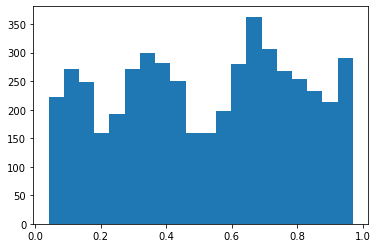

In [43]:
plt.hist(model.predict(X_test), bins=20)

In [44]:
roc_auc_score(df_feat['label'][int(df_feat.shape[0]*0.85):], pred)

NameError: name 'pred' is not defined

In [45]:
roc_auc_score(y_test, pred)

NameError: name 'pred' is not defined

## model for the residual

In [26]:
resid = pd.read_csv('./residual.csv')

In [27]:
resid.index = resid.Time_UTC_Start

In [28]:
resid = resid.dropna()

In [29]:
resid

,Time_UTC_Start,resid
Time_UTC_Start,,
2018-07-19 11:00:00,2018-07-19 11:00:00,17.254953
2018-07-19 12:00:00,2018-07-19 12:00:00,70.399943
2018-07-19 13:00:00,2018-07-19 13:00:00,60.481332
2018-07-19 14:00:00,2018-07-19 14:00:00,83.327526
2018-07-19 15:00:00,2018-07-19 15:00:00,116.421246
...,...,...
2022-05-07 03:00:00,2022-05-07 03:00:00,-167.548267
2022-05-07 04:00:00,2022-05-07 04:00:00,-251.562969
2022-05-07 05:00:00,2022-05-07 05:00:00,-205.419721


(array([   74.,    79.,   126.,   155.,   225.,   350.,   603.,   929.,
         1887., 10023., 13824.,  2100.,  1154.,   680.,   435.,   271.,
          159.,   105.,    78.,    52.]),
 array([-3221.25643253, -2900.12063806, -2578.98484359, -2257.84904913,
        -1936.71325466, -1615.5774602 , -1294.44166573,  -973.30587126,
         -652.1700768 ,  -331.03428233,    -9.89848787,   311.2373066 ,
          632.37310107,   953.50889553,  1274.64469   ,  1595.78048446,
         1916.91627893,  2238.0520734 ,  2559.18786786,  2880.32366233,
         3201.45945679]),
 <BarContainer object of 20 artists>)

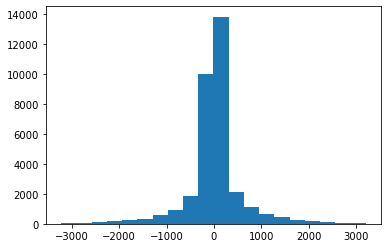

In [30]:
plt.hist(resid.resid, bins=20)

In [31]:
new_r = []
for x in range(20, len(resid['resid'])):
    print(x)
    r = resid['resid'][x-20:x+1]
    std = r.std()
    if std == 0:
        print(r)
    new_r.append(r.tolist()[-1]/std)

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289


2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328


4417
4418
4419
4420
4421
4422
4423
4424
4425
4426
4427
4428
4429
4430
4431
4432
4433
4434
4435
4436
4437
4438
4439
4440
4441
4442
4443
4444
4445
4446
4447
4448
4449
4450
4451
4452
4453
4454
4455
4456
4457
4458
4459
4460
4461
4462
4463
4464
4465
4466
4467
4468
4469
4470
4471
4472
4473
4474
4475
4476
4477
4478
4479
4480
4481
4482
4483
4484
4485
4486
4487
4488
4489
4490
4491
4492
4493
4494
4495
4496
4497
4498
4499
4500
4501
4502
4503
4504
4505
4506
4507
4508
4509
4510
4511
4512
4513
4514
4515
4516
4517
4518
4519
4520
4521
4522
4523
4524
4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616


6666
6667
6668
6669
6670
6671
6672
6673
6674
6675
6676
6677
6678
6679
6680
6681
6682
6683
6684
6685
6686
6687
6688
6689
6690
6691
6692
6693
6694
6695
6696
6697
6698
6699
6700
6701
6702
6703
6704
6705
6706
6707
6708
6709
6710
6711
6712
6713
6714
6715
6716
6717
6718
6719
6720
6721
6722
6723
6724
6725
6726
6727
6728
6729
6730
6731
6732
6733
6734
6735
6736
6737
6738
6739
6740
6741
6742
6743
6744
6745
6746
6747
6748
6749
6750
6751
6752
6753
6754
6755
6756
6757
6758
6759
6760
6761
6762
6763
6764
6765
6766
6767
6768
6769
6770
6771
6772
6773
6774
6775
6776
6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865


8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084


11227
11228
11229
11230
11231
11232
11233
11234
11235
11236
11237
11238
11239
11240
11241
11242
11243
11244
11245
11246
11247
11248
11249
11250
11251
11252
11253
11254
11255
11256
11257
11258
11259
11260
11261
11262
11263
11264
11265
11266
11267
11268
11269
11270
11271
11272
11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11316
11317
11318
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11354
11355
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11375
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
1139

13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
1363

15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
15793
15794
15795
15796
15797
15798
15799
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
1588

18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18089
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18153
18154
18155
18156
18157
18158
18159
18160
18161
18162
18163
18164
18165
18166
18167
18168
18169
18170
18171
18172
18173
18174
18175
18176
18177
18178
18179
18180
18181
18182
18183
18184
18185
18186
18187
18188
18189
18190
18191
18192
18193
18194
18195
18196
18197
18198
18199
18200
18201
18202
18203
18204
18205
18206
18207
18208
18209
18210
18211
18212
18213
18214
18215
18216
18217
18218
18219
18220
18221
18222
18223
18224
18225
18226
1822

20253
20254
20255
20256
20257
20258
20259
20260
20261
20262
20263
20264
20265
20266
20267
20268
20269
20270
20271
20272
20273
20274
20275
20276
20277
20278
20279
20280
20281
20282
20283
20284
20285
20286
20287
20288
20289
20290
20291
20292
20293
20294
20295
20296
20297
20298
20299
20300
20301
20302
20303
20304
20305
20306
20307
20308
20309
20310
20311
20312
20313
20314
20315
20316
20317
20318
20319
20320
20321
20322
20323
20324
20325
20326
20327
20328
20329
20330
20331
20332
20333
20334
20335
20336
20337
20338
20339
20340
20341
20342
20343
20344
20345
20346
20347
20348
20349
20350
20351
20352
20353
20354
20355
20356
20357
20358
20359
20360
20361
20362
20363
20364
20365
20366
20367
20368
20369
20370
20371
20372
20373
20374
20375
20376
20377
20378
20379
20380
20381
20382
20383
20384
20385
20386
20387
20388
20389
20390
20391
20392
20393
20394
20395
20396
20397
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
20411
20412
20413
20414
20415
20416
20417
20418
2041

22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
22614
22615
22616
22617
22618
22619
22620
22621
22622
22623
22624
22625
22626
22627
22628
22629
22630
22631
22632
22633
22634
22635
22636
22637
22638
22639
22640
22641
22642
22643
22644
22645
22646
22647
22648
22649
22650
22651
22652
22653
22654
22655
22656
22657
22658
22659
22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
2268

24809
24810
24811
24812
24813
24814
24815
24816
24817
24818
24819
24820
24821
24822
24823
24824
24825
24826
24827
24828
24829
24830
24831
24832
24833
24834
24835
24836
24837
24838
24839
24840
24841
24842
24843
24844
24845
24846
24847
24848
24849
24850
24851
24852
24853
24854
24855
24856
24857
24858
24859
24860
24861
24862
24863
24864
24865
24866
24867
24868
24869
24870
24871
24872
24873
24874
24875
24876
24877
24878
24879
24880
24881
24882
24883
24884
24885
24886
24887
24888
24889
24890
24891
24892
24893
24894
24895
24896
24897
24898
24899
24900
24901
24902
24903
24904
24905
24906
24907
24908
24909
24910
24911
24912
24913
24914
24915
24916
24917
24918
24919
24920
24921
24922
24923
24924
24925
24926
24927
24928
24929
24930
24931
24932
24933
24934
24935
24936
24937
24938
24939
24940
24941
24942
24943
24944
24945
24946
24947
24948
24949
24950
24951
24952
24953
24954
24955
24956
24957
24958
24959
24960
24961
24962
24963
24964
24965
24966
24967
24968
24969
24970
24971
24972
24973
24974
2497

27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27113
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
27165
27166
27167
27168
27169
27170
27171
27172
27173
27174
27175
27176
27177
27178
27179
27180
27181
27182
27183
27184
27185
27186
27187
27188
27189
27190
27191
27192
27193
27194
27195
27196
27197
27198
27199
27200
27201
27202
27203
27204
27205
27206
27207
27208
27209
27210
27211
27212
27213
27214
27215
27216
27217
27218
27219
27220
27221
27222
27223
27224
27225
27226
27227
27228
27229
27230
27231
27232
27233
27234
27235
27236
27237
27238
27239
27240
27241
27242
27243
27244
27245
27246
27247
27248
27249
27250
27251
27252
27253
27254
27255
27256
27257
27258
27259
27260
2726

29431
29432
29433
29434
29435
29436
29437
29438
29439
29440
29441
29442
29443
29444
29445
29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
29528
29529
29530
29531
29532
29533
29534
29535
29536
29537
29538
29539
29540
29541
29542
29543
29544
29545
29546
29547
29548
29549
29550
29551
29552
29553
29554
29555
29556
29557
29558
29559
29560
29561
29562
29563
29564
29565
29566
29567
29568
29569
29570
29571
29572
29573
29574
29575
29576
29577
29578
29579
29580
29581
29582
29583
29584
29585
29586
29587
29588
29589
29590
29591
29592
29593
29594
29595
29596
2959

31667
31668
31669
31670
31671
31672
31673
31674
31675
31676
31677
31678
31679
31680
31681
31682
31683
31684
31685
31686
31687
31688
31689
31690
31691
31692
31693
31694
31695
31696
31697
31698
31699
31700
31701
31702
31703
31704
31705
31706
31707
31708
31709
31710
31711
31712
31713
31714
31715
31716
31717
31718
31719
31720
31721
31722
31723
31724
31725
31726
31727
31728
31729
31730
31731
31732
31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
31814
31815
31816
31817
31818
31819
31820
31821
31822
31823
31824
31825
31826
31827
31828
31829
31830
31831
31832
3183

In [32]:
resid = resid.iloc[20:]
resid['resid_norm'] = new_r

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9672\2708008628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resid['resid_norm'] = new_r


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 7.000e+00, 4.000e+00, 6.000e+00, 1.200e+01,
        1.300e+01, 4.300e+01, 6.900e+01, 1.120e+02, 2.300e+02, 3.870e+02,
        5.490e+02, 9.100e+02, 1.343e+03, 1.808e+03, 2.332e+03, 2.723e+03,
        3.074e+03, 3.304e+03, 3.203e+03, 3.089e+03, 2.747e+03, 2.181e+03,
        1.735e+03, 1.218e+03, 8.300e+02, 5.240e+02, 3.350e+02, 2.110e+02,
        1.300e+02, 7.700e+01, 3.900e+01, 1.800e+01, 1.000e+01, 6.000e+00,
        0.000e+00, 5.000e+00]),
 array([-12.29554948, -11.90709803, -11.51864658, -11.13019514,
        -10.74174369, -10.35329224,  -9.96484079,  -9.57638935,
         -9.1879379 ,  -8.79948645,  -8.41103501,  -8.02258356,
         -7.63413211,  -7.24568066,  -6.85722922,  -6.46877777,
         -6.08032632,  -5.69187487,  -5.30342343,  -4.91497198,
         -4.52652053,  -4.13806908,  -3.74961764,  -3.36

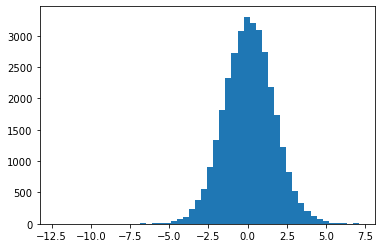

In [33]:
plt.hist(new_r, bins=50)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
df_r = pd.merge(df_feat, resid, left_index=True, right_index=True)

In [36]:
df_r

,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,label,...,mean_Close_change_3600M,median_Close_change_3600M,min_Close_change_12000M,max_Close_change_12000M,mean_Close_change_12000M,median_Close_change_12000M,var_Close_change_12000M,Time_UTC_Start,resid,resid_norm
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-26 20:00:00,8261.10,8299.08,8118.02,8145.72,2538.278252,2.086387e+07,13209,1319.258433,1.084160e+07,0.0,...,0.105943,0.213602,0.742546,-0.794061,0.210178,0.306507,-0.584328,2018-07-26 20:00:00,40.104975,0.931116
2018-07-26 21:00:00,8145.72,8159.99,7914.00,7972.30,7465.444975,5.996988e+07,36160,3172.928840,2.549350e+07,0.0,...,0.059557,0.213602,0.742546,-0.794061,0.167137,0.278075,-0.583483,2018-07-26 21:00:00,-91.721942,-1.976684
2018-07-26 22:00:00,7972.30,8057.11,7912.03,7915.00,3599.830176,2.871459e+07,18199,1840.147242,1.468130e+07,0.0,...,-0.061775,0.161946,0.731077,-0.794061,0.105315,0.245685,-0.581728,2018-07-26 22:00:00,-254.338112,-3.413010
2018-07-26 23:00:00,7917.00,7958.21,7850.06,7920.00,4105.981315,3.244956e+07,19303,1930.956664,1.526536e+07,1.0,...,-0.165510,0.011076,0.731077,-0.794061,0.088380,0.245685,-0.581527,2018-07-26 23:00:00,-366.091200,-3.359148
2018-07-27 00:00:00,7920.00,7963.94,7891.24,7908.77,1845.983649,1.462198e+07,9043,1001.334300,7.932613e+06,0.0,...,-0.229140,0.003491,0.731077,-0.794061,0.097682,0.245685,-0.581567,2018-07-27 00:00:00,-276.796370,-2.246157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,35953.63,35959.99,35760.00,35812.21,950.370320,3.407918e+07,23893,440.466220,1.579364e+07,0.0,...,-1.692382,-1.067973,-0.804418,-0.067629,-1.370791,-2.009394,-0.130666,2022-05-07 03:00:00,-167.548267,-0.459039
2022-05-07 04:00:00,35812.22,35882.67,35725.72,35746.63,1038.354640,3.717972e+07,25448,505.470370,1.809844e+07,0.0,...,-1.885023,-1.228478,-0.804418,-0.067629,-1.384100,-2.009394,-0.130190,2022-05-07 04:00:00,-251.562969,-0.731097
2022-05-07 05:00:00,35746.62,35900.00,35722.24,35898.95,897.235930,3.215497e+07,22906,428.196080,1.534393e+07,1.0,...,-2.050652,-1.335891,-0.804418,-0.067629,-1.368786,-2.009394,-0.130569,2022-05-07 05:00:00,-205.419721,-0.651308


In [37]:
df_lol = base_feat(resid, base_cols=['resid', 'resid_norm'], time_delta=60, 
                                                              window_lookback=[1, 3, 6, 10, 60],
                                                              agg_func=['mean', 'median', 'var', 'max', 'min'])

{'mean_resid_60M': 'mean', 'median_resid_60M': 'median', 'var_resid_60M': 'var', 'max_resid_60M': 'max', 'min_resid_60M': 'min'}
{'mean_resid_180M': 'mean', 'median_resid_180M': 'median', 'var_resid_180M': 'var', 'max_resid_180M': 'max', 'min_resid_180M': 'min'}
{'mean_resid_360M': 'mean', 'median_resid_360M': 'median', 'var_resid_360M': 'var', 'max_resid_360M': 'max', 'min_resid_360M': 'min'}
{'mean_resid_600M': 'mean', 'median_resid_600M': 'median', 'var_resid_600M': 'var', 'max_resid_600M': 'max', 'min_resid_600M': 'min'}
{'mean_resid_3600M': 'mean', 'median_resid_3600M': 'median', 'var_resid_3600M': 'var', 'max_resid_3600M': 'max', 'min_resid_3600M': 'min'}
{'mean_resid_norm_60M': 'mean', 'median_resid_norm_60M': 'median', 'var_resid_norm_60M': 'var', 'max_resid_norm_60M': 'max', 'min_resid_norm_60M': 'min'}
{'mean_resid_norm_180M': 'mean', 'median_resid_norm_180M': 'median', 'var_resid_norm_180M': 'var', 'max_resid_norm_180M': 'max', 'min_resid_norm_180M': 'min'}
{'mean_resid_norm

In [38]:
df_lol = df_lol.drop(columns=['Time_UTC_Start', 'resid', 'resid_norm'])

In [39]:
df_lol

,mean_resid_60M,median_resid_60M,max_resid_60M,min_resid_60M,mean_resid_180M,median_resid_180M,var_resid_180M,max_resid_180M,min_resid_180M,mean_resid_360M,...,max_resid_norm_360M,min_resid_norm_360M,mean_resid_norm_600M,median_resid_norm_600M,max_resid_norm_600M,min_resid_norm_600M,mean_resid_norm_3600M,median_resid_norm_3600M,max_resid_norm_3600M,min_resid_norm_3600M
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-22 19:00:00,84.248877,84.248877,84.248877,84.248877,76.421760,84.248877,211.921077,85.391262,59.625140,63.514022,...,3.552810,0.794183,2.150572,1.967003,3.552810,0.794183,0.326508,0.738268,3.552810,-2.467676
2018-07-22 20:00:00,88.341067,88.341067,88.341067,88.341067,77.405028,84.248877,241.279811,88.341067,59.625140,74.514013,...,3.552810,1.483028,2.314553,2.266470,3.552810,0.794183,0.402051,0.779880,3.552810,-2.467676
2018-07-22 21:00:00,92.666433,92.666433,92.666433,92.666433,88.418792,88.341067,17.718347,92.666433,84.248877,83.080914,...,3.552810,2.468110,2.494398,2.862898,3.552810,0.794183,0.443698,0.779880,3.552810,-2.467676
2018-07-22 22:00:00,127.220767,127.220767,127.220767,127.220767,102.742756,92.666433,454.056954,127.220767,88.341067,89.582258,...,4.202941,2.468110,2.708209,3.281457,4.202941,0.794183,0.495597,0.779880,4.202941,-2.467676
2018-07-22 23:00:00,-61.749571,-61.749571,-61.749571,-61.749571,52.712543,92.666433,10124.682089,127.220767,-61.749571,65.058786,...,4.202941,-1.546137,2.449151,3.281457,4.202941,-1.546137,0.453565,0.738268,4.202941,-2.467676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,-108.378851,-108.378851,-108.378851,-108.378851,-119.972517,-108.378851,457.227255,-106.890328,-144.648371,-156.279697,...,-0.219631,-0.605572,-0.372428,-0.336872,-0.219631,-0.605572,-0.159815,-0.400134,2.688766,-2.836277
2022-05-07 04:00:00,-167.548267,-167.548267,-167.548267,-167.548267,-140.191830,-144.648371,890.150508,-108.378851,-167.548267,-155.135647,...,-0.219631,-0.605572,-0.395669,-0.400134,-0.219631,-0.605572,-0.182156,-0.450972,2.688766,-2.836277
2022-05-07 05:00:00,-251.562969,-251.562969,-251.562969,-251.562969,-175.830029,-167.548267,5176.863615,-108.378851,-251.562969,-147.035588,...,-0.219631,-0.731097,-0.417277,-0.400134,-0.219631,-0.731097,-0.215920,-0.474997,2.688766,-2.836277


In [40]:
df_r

,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,label,...,mean_Close_change_3600M,median_Close_change_3600M,min_Close_change_12000M,max_Close_change_12000M,mean_Close_change_12000M,median_Close_change_12000M,var_Close_change_12000M,Time_UTC_Start,resid,resid_norm
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-26 20:00:00,8261.10,8299.08,8118.02,8145.72,2538.278252,2.086387e+07,13209,1319.258433,1.084160e+07,0.0,...,0.105943,0.213602,0.742546,-0.794061,0.210178,0.306507,-0.584328,2018-07-26 20:00:00,40.104975,0.931116
2018-07-26 21:00:00,8145.72,8159.99,7914.00,7972.30,7465.444975,5.996988e+07,36160,3172.928840,2.549350e+07,0.0,...,0.059557,0.213602,0.742546,-0.794061,0.167137,0.278075,-0.583483,2018-07-26 21:00:00,-91.721942,-1.976684
2018-07-26 22:00:00,7972.30,8057.11,7912.03,7915.00,3599.830176,2.871459e+07,18199,1840.147242,1.468130e+07,0.0,...,-0.061775,0.161946,0.731077,-0.794061,0.105315,0.245685,-0.581728,2018-07-26 22:00:00,-254.338112,-3.413010
2018-07-26 23:00:00,7917.00,7958.21,7850.06,7920.00,4105.981315,3.244956e+07,19303,1930.956664,1.526536e+07,1.0,...,-0.165510,0.011076,0.731077,-0.794061,0.088380,0.245685,-0.581527,2018-07-26 23:00:00,-366.091200,-3.359148
2018-07-27 00:00:00,7920.00,7963.94,7891.24,7908.77,1845.983649,1.462198e+07,9043,1001.334300,7.932613e+06,0.0,...,-0.229140,0.003491,0.731077,-0.794061,0.097682,0.245685,-0.581567,2018-07-27 00:00:00,-276.796370,-2.246157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,35953.63,35959.99,35760.00,35812.21,950.370320,3.407918e+07,23893,440.466220,1.579364e+07,0.0,...,-1.692382,-1.067973,-0.804418,-0.067629,-1.370791,-2.009394,-0.130666,2022-05-07 03:00:00,-167.548267,-0.459039
2022-05-07 04:00:00,35812.22,35882.67,35725.72,35746.63,1038.354640,3.717972e+07,25448,505.470370,1.809844e+07,0.0,...,-1.885023,-1.228478,-0.804418,-0.067629,-1.384100,-2.009394,-0.130190,2022-05-07 04:00:00,-251.562969,-0.731097
2022-05-07 05:00:00,35746.62,35900.00,35722.24,35898.95,897.235930,3.215497e+07,22906,428.196080,1.534393e+07,1.0,...,-2.050652,-1.335891,-0.804418,-0.067629,-1.368786,-2.009394,-0.130569,2022-05-07 05:00:00,-205.419721,-0.651308


In [45]:
pd.concat([df_r[feat], df_lol.iloc[225:]], axis=1).dropna()

,min_Quote_asset_volume_60M,max_Quote_asset_volume_60M,mean_Quote_asset_volume_60M,median_Quote_asset_volume_60M,min_Quote_asset_volume_300M,max_Quote_asset_volume_300M,mean_Quote_asset_volume_300M,median_Quote_asset_volume_300M,var_Quote_asset_volume_300M,min_Quote_asset_volume_600M,...,max_resid_norm_360M,min_resid_norm_360M,mean_resid_norm_600M,median_resid_norm_600M,max_resid_norm_600M,min_resid_norm_600M,mean_resid_norm_3600M,median_resid_norm_3600M,max_resid_norm_3600M,min_resid_norm_3600M
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-08-01 04:00:00,-0.557416,-0.557416,-0.557416,-0.557416,-0.525920,-0.555943,-0.542132,-0.458613,-0.184041,-0.629322,...,-1.671463,-2.983006,-2.151815,-2.019314,-1.671463,-2.983006,-1.074704,-0.953855,1.091118,-3.998727
2018-08-01 05:00:00,-0.561135,-0.561135,-0.561135,-0.561135,-0.526243,-0.555943,-0.574515,-0.606836,-0.184171,-0.629322,...,-1.671463,-2.983006,-2.215341,-2.019314,-1.671463,-2.983006,-1.119044,-1.219191,1.091118,-3.998727
2018-08-01 06:00:00,-0.493716,-0.493716,-0.493716,-0.493716,-0.526243,-0.555943,-0.559266,-0.528259,-0.184793,-0.629322,...,-1.671463,-3.278851,-2.367136,-2.081142,-1.671463,-3.278851,-1.168416,-1.281534,1.091118,-3.998727
2018-08-01 07:00:00,-0.563532,-0.563532,-0.563532,-0.563532,-0.530588,-0.569587,-0.592541,-0.606836,-0.185675,-0.629322,...,-2.116199,-3.752157,-2.547101,-2.481227,-1.671463,-3.752157,-1.233598,-1.347016,1.091118,-3.998727
2018-08-01 08:00:00,-0.590881,-0.590881,-0.590881,-0.590881,-0.580157,-0.607243,-0.627379,-0.611423,-0.186916,-0.629322,...,-2.846256,-3.752157,-2.700712,-2.857583,-1.671463,-3.752157,-1.300696,-1.406418,1.091118,-3.998727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,-0.399719,-0.399719,-0.399719,-0.399719,-0.239132,-0.465925,-0.402498,-0.370089,-0.185990,-0.179804,...,-0.219631,-0.605572,-0.372428,-0.336872,-0.219631,-0.605572,-0.159815,-0.400134,2.688766,-2.836277
2022-05-07 04:00:00,-0.278579,-0.278579,-0.278579,-0.278579,-0.239132,-0.463756,-0.401760,-0.370089,-0.185908,-0.179804,...,-0.219631,-0.605572,-0.395669,-0.400134,-0.219631,-0.605572,-0.182156,-0.450972,2.688766,-2.836277
2022-05-07 05:00:00,-0.237794,-0.237794,-0.237794,-0.237794,-0.233687,-0.436554,-0.364359,-0.320439,-0.184926,-0.179804,...,-0.219631,-0.731097,-0.417277,-0.400134,-0.219631,-0.731097,-0.215920,-0.474997,2.688766,-2.836277


In [48]:
df_r.iloc[128:]['resid']

Time_UTC_Start
2018-08-01 04:00:00   -266.822553
2018-08-01 05:00:00   -248.185555
2018-08-01 06:00:00   -244.726528
2018-08-01 07:00:00   -199.895225
2018-08-01 08:00:00   -146.749816
                          ...    
2022-05-07 03:00:00   -167.548267
2022-05-07 04:00:00   -251.562969
2022-05-07 05:00:00   -205.419721
2022-05-07 06:00:00   -149.147778
2022-05-07 07:00:00   -167.502725
Name: resid, Length: 32736, dtype: float64

In [46]:
864-736

128

In [61]:
X, y = pd.concat([df_r[feat], df_lol.iloc[+225:]], axis=1).dropna(), df_r.iloc[128:]['resid']
X_train_r, X_valid_r, X_test_r = X[:int(X.shape[0]*0.6)], X[int(X.shape[0]*0.6):int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8):]
y_train_r, y_valid_r, y_test_r = y[:int(X.shape[0]*0.6)], y[int(X.shape[0]*0.6):int(X.shape[0]*0.8)], y[int(X.shape[0]*0.8):]

In [78]:
X.columns.tolist()

['min_Quote_asset_volume_60M',
 'max_Quote_asset_volume_60M',
 'mean_Quote_asset_volume_60M',
 'median_Quote_asset_volume_60M',
 'min_Quote_asset_volume_300M',
 'max_Quote_asset_volume_300M',
 'mean_Quote_asset_volume_300M',
 'median_Quote_asset_volume_300M',
 'var_Quote_asset_volume_300M',
 'min_Quote_asset_volume_600M',
 'max_Quote_asset_volume_600M',
 'mean_Quote_asset_volume_600M',
 'median_Quote_asset_volume_600M',
 'min_Quote_asset_volume_3600M',
 'max_Quote_asset_volume_3600M',
 'mean_Quote_asset_volume_3600M',
 'median_Quote_asset_volume_3600M',
 'min_Quote_asset_volume_12000M',
 'max_Quote_asset_volume_12000M',
 'mean_Quote_asset_volume_12000M',
 'median_Quote_asset_volume_12000M',
 'var_Quote_asset_volume_12000M',
 'min_Number_of_trades_60M',
 'max_Number_of_trades_60M',
 'mean_Number_of_trades_60M',
 'median_Number_of_trades_60M',
 'min_Number_of_trades_300M',
 'max_Number_of_trades_300M',
 'mean_Number_of_trades_300M',
 'median_Number_of_trades_300M',
 'var_Number_of_trades

In [63]:
linear_r = Ridge(alpha=0.8e4)

In [64]:
linear_r.fit(X_train_r, y_train_r)

Ridge(alpha=8000.0)

In [65]:
def take_the_error(model_regression, training_set, valid_set, test_set):
    X_train, y_train = training_set[0], training_set[1]
    X_valid, y_valid = valid_set[0], valid_set[1]
    X_test, y_test = test_set[0], test_set[1]
    train_pred = model_regression.predict(X_train)
    valid_pred = model_regression.predict(X_valid)
    test_pred = model_regression.predict(X_test)
    train = (((train_pred * y_train) >= 0) * 1).sum()/len(y_train)
    valid = (((valid_pred * y_valid) >= 0) * 1).sum()/len(y_valid)
    test = (((test_pred * y_test) >= 0) * 1).sum()/len(y_test)
    mse_train, mse_valid, mse_test = mean_squared_error(y_train, train_pred), mean_squared_error(y_valid, valid_pred), mean_squared_error(y_test, test_pred)
    rmse_train, rmse_valid, rmse_test = math.sqrt(mse_train), math.sqrt(mse_valid), math.sqrt(mse_test)
    mape_train, mape_valid, mape_test = mean_absolute_percentage_error(y_train, train_pred), mean_absolute_percentage_error(y_valid, valid_pred), mean_absolute_percentage_error(y_test, test_pred)
    print(f'Train error is: MSE= {mse_train}, RMSE={rmse_train}, MAPE={mape_train}, ACC={train}')
    print(f'Valid error is: MSE= {mse_valid}, RMSE={rmse_valid}, MAPE={mape_valid}, ACC={valid}')
    print(f'Test error is: MSE= {mse_test}, RMSE={rmse_test}, MAPE={mape_test}, ACC={test}')
    return train_pred, valid_pred, test_pred

In [66]:
y_train_pred_r, y_valid_pred_r, y_test_pred_r = take_the_error(linear_r, [X_train_r, y_train_r], [X_valid_r, y_valid_r], [X_test_r, y_test_r])

Train error is: MSE= 1913.6377005301317, RMSE=43.74514487951928, MAPE=1.4829224284173887, ACC=0.9044855149941449
Valid error is: MSE= 87982.96857513064, RMSE=296.61923163397654, MAPE=7.044095786650899, ACC=0.914006415151978
Test error is: MSE= 58315.40931284572, RMSE=241.48583667131643, MAPE=1.6629816090642129, ACC=0.9100488698839341


In [89]:
df_importance = pd.DataFrame()
df_importance.index = X.columns
df_importance['coeff'] = linear_r.coef_
df_importance['abs_coeff'] = abs(df_importance['coeff'])

In [94]:
df_importance.sort_values('abs_coeff', ascending=False).head(20)

,coeff,abs_coeff
mean_Close_change_60M,13.336624,13.336624
max_Close_change_60M,13.336624,13.336624
median_Close_change_60M,13.336624,13.336624
min_Close_change_60M,13.336624,13.336624
max_Low_change_60M,6.502088,6.502088
median_Low_change_60M,6.502088,6.502088
mean_Low_change_60M,6.502088,6.502088
min_Low_change_60M,6.502088,6.502088
mean_Close_change_300M,6.478325,6.478325
median_High_change_60M,5.701916,5.701916


In [100]:
np.corrcoef(X['mean_Close_change_300M'], y)[0][1]

0.671209464123839

In [119]:
df_corr = pd.DataFrame()
df_corr.index = X.columns
df_corr['corr'] = corr
df_corr.sort_values('corr', ascending=False).head(20)

,corr
median_resid_60M,0.931416
mean_resid_60M,0.931416
max_resid_60M,0.931416
min_resid_60M,0.931416
mean_resid_180M,0.897042
median_resid_180M,0.888025
max_resid_180M,0.875441
min_resid_180M,0.870110
mean_Close_change_600M,0.849805
mean_High_change_600M,0.837032


In [104]:
(y_train_pred_r >= 0).sum()

10394

In [105]:
(y_train_pred_r >=0).sum()

10394

In [106]:
abs(y_train_pred_r - y_train_r)

Time_UTC_Start
2018-08-01 04:00:00    19.284707
2018-08-01 05:00:00     4.647322
2018-08-01 06:00:00     1.235093
2018-08-01 07:00:00     1.403158
2018-08-01 08:00:00    40.643835
                         ...    
2020-11-03 07:00:00    36.829675
2020-11-03 08:00:00    79.335279
2020-11-03 09:00:00    15.442664
2020-11-03 10:00:00    17.723457
2020-11-03 11:00:00     1.050929
Name: resid, Length: 19641, dtype: float64

In [107]:
abs((y_test_pred_r - y_test_r)/y_test_r).mean()

1.6629816090642204

In [108]:
y_test_pred_r.tolist()[80:95]

[473.3323997147706,
 267.62232605413703,
 185.90407660991002,
 -40.34639958571411,
 -39.666577075076844,
 147.21384236418314,
 167.10190132636657,
 -186.94457960575954,
 -316.2935459533935,
 -139.44979381726284,
 -145.36272493512595,
 -319.4873315571719,
 -453.11795423414145,
 -763.1367024901762,
 -650.1704185921321]

In [109]:
y_test_r.tolist()[80:95]

[436.08203064028817,
 210.6536119022908,
 -39.77819450379957,
 -206.19897515341967,
 129.80914230227552,
 302.5250662087901,
 94.99744364210405,
 -333.6583806229189,
 -307.7692234123034,
 72.93841512636615,
 -164.5049738926104,
 -394.33979587868,
 -721.6547792180174,
 -736.236942852747,
 -674.8673734783451]

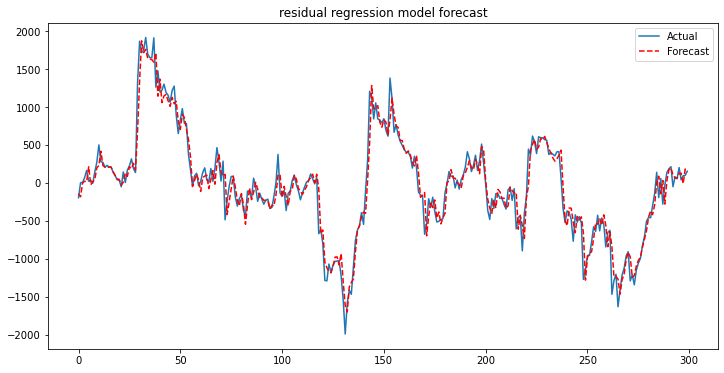

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_r.tolist()[-1000:-700], label='Actual')
plt.plot(y_test_pred_r.tolist()[-1000:-700], color='red', linestyle='--', label = 'Forecast')
plt.legend()
plt.title('residual regression model forecast')
plt.show()

In [111]:
df_feat

,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,label,...,median_Close_change_600M,min_Close_change_3600M,max_Close_change_3600M,mean_Close_change_3600M,median_Close_change_3600M,min_Close_change_12000M,max_Close_change_12000M,mean_Close_change_12000M,median_Close_change_12000M,var_Close_change_12000M
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-26 20:00:00,8261.10,8299.08,8118.02,8145.72,2538.278252,2.086387e+07,13209,1319.258433,1.084160e+07,0.0,...,0.082818,0.70172,-0.672697,0.105943,0.213602,0.742546,-0.794061,0.210178,0.306507,-0.584328
2018-07-26 21:00:00,8145.72,8159.99,7914.00,7972.30,7465.444975,5.996988e+07,36160,3172.928840,2.549350e+07,0.0,...,-0.097994,0.66372,-0.672697,0.059557,0.213602,0.742546,-0.794061,0.167137,0.278075,-0.583483
2018-07-26 22:00:00,7972.30,8057.11,7912.03,7915.00,3599.830176,2.871459e+07,18199,1840.147242,1.468130e+07,0.0,...,-0.097994,0.56367,-0.672697,-0.061775,0.161946,0.731077,-0.794061,0.105315,0.245685,-0.581728
2018-07-26 23:00:00,7917.00,7958.21,7850.06,7920.00,4105.981315,3.244956e+07,19303,1930.956664,1.526536e+07,1.0,...,-0.112511,0.56367,-0.684273,-0.165510,0.011076,0.731077,-0.794061,0.088380,0.245685,-0.581527
2018-07-27 00:00:00,7920.00,7963.94,7891.24,7908.77,1845.983649,1.462198e+07,9043,1001.334300,7.932613e+06,0.0,...,0.057661,0.56367,-0.712001,-0.229140,0.003491,0.731077,-0.794061,0.097682,0.245685,-0.581567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,35953.63,35959.99,35760.00,35812.21,950.370320,3.407918e+07,23893,440.466220,1.579364e+07,0.0,...,0.249798,-1.48931,0.304155,-1.692382,-1.067973,-0.804418,-0.067629,-1.370791,-2.009394,-0.130666
2022-05-07 04:00:00,35812.22,35882.67,35725.72,35746.63,1038.354640,3.717972e+07,25448,505.470370,1.809844e+07,0.0,...,0.249798,-1.48931,0.304155,-1.885023,-1.228478,-0.804418,-0.067629,-1.384100,-2.009394,-0.130190
2022-05-07 05:00:00,35746.62,35900.00,35722.24,35898.95,897.235930,3.215497e+07,22906,428.196080,1.534393e+07,1.0,...,-0.046312,-1.48931,0.304155,-2.050652,-1.335891,-0.804418,-0.067629,-1.368786,-2.009394,-0.130569


## regression Trend + seasonal

In [112]:
df_t = pd.read_csv('./trend_and_seasonal.csv')

In [113]:
df_t.index = df_t.Time_UTC_Start

In [114]:
r_t = df_t['price'] - df_t['price'].shift(1)

In [115]:
r_t.dropna(inplace=True)

(array([4.0000e+00, 5.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00,
        1.0000e+00, 2.0000e+00, 1.1000e+01, 1.4000e+01, 9.0000e+00,
        2.0000e+01, 2.4000e+01, 3.1000e+01, 4.7000e+01, 5.5000e+01,
        4.9000e+01, 9.5000e+01, 1.3200e+02, 1.4600e+02, 1.9400e+02,
        2.6300e+02, 3.9200e+02, 5.6700e+02, 8.4500e+02, 1.3710e+03,
        3.7560e+03, 1.2232e+04, 7.2900e+03, 2.0040e+03, 1.0720e+03,
        7.5000e+02, 5.6900e+02, 3.8100e+02, 2.8100e+02, 1.9900e+02,
        1.4600e+02, 1.0400e+02, 1.0300e+02, 6.3000e+01, 2.3000e+01,
        1.5000e+01, 1.7000e+01, 3.0000e+00, 4.0000e+00, 2.0000e+00,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-421.16582388, -405.38935308, -389.61288229, -373.83641149,
        -358.0599407 , -342.2834699 , -326.50699911, -310.73052831,
        -294.95405752, -279.17758672, -263.40111593, -247.62464513,
        -231.84817434, -216.07170354, -200.29523275, -184.51876195,
        -168.74229116, -152.96582036, -137.189

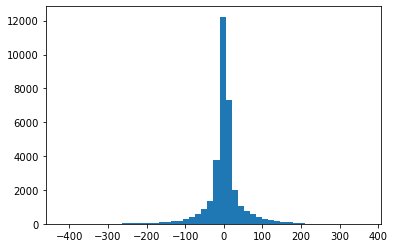

In [116]:
plt.hist(r_t, bins=50)

In [117]:
new_t = []
for x in range(30, len(r_t)):
    print(x)
    r = r_t[x-30:x+1]
    std = r.std()
    if std == 0:
        print(r)
    new_t.append(r.tolist()[-1]/std)

30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
29

2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537


4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744
4745
4746
4747
4748
4749
4750
4751
4752
4753
4754
4755
4756
4757
4758
4759
4760
4761
4762
4763
4764
4765
4766
4767
4768
4769
4770
4771
4772
4773
4774
4775
4776
4777
4778
4779
4780
4781
4782
4783
4784
4785
4786
4787
4788
4789
4790
4791
4792
4793
4794
4795
4796
4797
4798
4799
4800
4801
4802
4803
4804
4805
4806
4807
4808
4809
4810
4811
4812
4813
4814
4815
4816
4817
4818
4819
4820
4821
4822
4823
4824
4825
4826
4827
4828
4829
4830
4831
4832
4833
4834
4835
4836
4837
4838
4839
4840
4841
4842
4843
4844
4845
4846
4847
4848
4849
4850
4851
4852
4853
4854
4855
4856
4857
4858
4859
4860
4861
4862
4863
4864


6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133


8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184


10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
10980
10981
10982
10983
10984
10985
10986
10987
10988
10989
10990
10991
10992
10993
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
1105

12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
1298

14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
15022
15023
15024
15025
15026
15027
15028
15029
15030
15031
15032
15033
15034
15035
15036
15037
15038
15039
15040
15041
15042
15043
15044
15045
15046
15047
15048
15049
15050
15051
15052
15053
15054
1505

16866
16867
16868
16869
16870
16871
16872
16873
16874
16875
16876
16877
16878
16879
16880
16881
16882
16883
16884
16885
16886
16887
16888
16889
16890
16891
16892
16893
16894
16895
16896
16897
16898
16899
16900
16901
16902
16903
16904
16905
16906
16907
16908
16909
16910
16911
16912
16913
16914
16915
16916
16917
16918
16919
16920
16921
16922
16923
16924
16925
16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
1703

18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18901
18902
18903
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18914
18915
18916
18917
18918
18919
18920
18921
18922
18923
18924
18925
18926
18927
18928
18929
18930
18931
18932
18933
18934
18935
18936
18937
18938
18939
18940
18941
18942
18943
18944
18945
18946
18947
18948
18949
18950
18951
18952
18953
18954
18955
18956
18957
18958
18959
18960
18961
18962
18963
18964
18965
18966
18967
18968
18969
18970
18971
18972
18973
18974
18975
18976
18977
18978
18979
18980
18981
18982
18983
18984
18985
18986
18987
18988
18989
18990
1899

20689
20690
20691
20692
20693
20694
20695
20696
20697
20698
20699
20700
20701
20702
20703
20704
20705
20706
20707
20708
20709
20710
20711
20712
20713
20714
20715
20716
20717
20718
20719
20720
20721
20722
20723
20724
20725
20726
20727
20728
20729
20730
20731
20732
20733
20734
20735
20736
20737
20738
20739
20740
20741
20742
20743
20744
20745
20746
20747
20748
20749
20750
20751
20752
20753
20754
20755
20756
20757
20758
20759
20760
20761
20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
2085

22645
22646
22647
22648
22649
22650
22651
22652
22653
22654
22655
22656
22657
22658
22659
22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
22700
22701
22702
22703
22704
22705
22706
22707
22708
22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
2281

24453
24454
24455
24456
24457
24458
24459
24460
24461
24462
24463
24464
24465
24466
24467
24468
24469
24470
24471
24472
24473
24474
24475
24476
24477
24478
24479
24480
24481
24482
24483
24484
24485
24486
24487
24488
24489
24490
24491
24492
24493
24494
24495
24496
24497
24498
24499
24500
24501
24502
24503
24504
24505
24506
24507
24508
24509
24510
24511
24512
24513
24514
24515
24516
24517
24518
24519
24520
24521
24522
24523
24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
24540
24541
24542
24543
24544
24545
24546
24547
24548
24549
24550
24551
24552
24553
24554
24555
24556
24557
24558
24559
24560
24561
24562
24563
24564
24565
24566
24567
24568
24569
24570
24571
24572
24573
24574
24575
24576
24577
24578
24579
24580
24581
24582
24583
24584
24585
24586
24587
24588
24589
24590
24591
24592
24593
24594
24595
24596
24597
24598
24599
24600
24601
24602
24603
24604
24605
24606
24607
24608
24609
24610
24611
24612
24613
24614
24615
24616
24617
24618
2461

26357
26358
26359
26360
26361
26362
26363
26364
26365
26366
26367
26368
26369
26370
26371
26372
26373
26374
26375
26376
26377
26378
26379
26380
26381
26382
26383
26384
26385
26386
26387
26388
26389
26390
26391
26392
26393
26394
26395
26396
26397
26398
26399
26400
26401
26402
26403
26404
26405
26406
26407
26408
26409
26410
26411
26412
26413
26414
26415
26416
26417
26418
26419
26420
26421
26422
26423
26424
26425
26426
26427
26428
26429
26430
26431
26432
26433
26434
26435
26436
26437
26438
26439
26440
26441
26442
26443
26444
26445
26446
26447
26448
26449
26450
26451
26452
26453
26454
26455
26456
26457
26458
26459
26460
26461
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
26474
26475
26476
26477
26478
26479
26480
26481
26482
26483
26484
26485
26486
26487
26488
26489
26490
26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
2652

28790
28791
28792
28793
28794
28795
28796
28797
28798
28799
28800
28801
28802
28803
28804
28805
28806
28807
28808
28809
28810
28811
28812
28813
28814
28815
28816
28817
28818
28819
28820
28821
28822
28823
28824
28825
28826
28827
28828
28829
28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
28903
28904
28905
28906
28907
28908
28909
28910
28911
28912
28913
28914
28915
28916
28917
28918
28919
28920
28921
28922
28923
28924
28925
28926
28927
28928
28929
28930
28931
28932
28933
28934
28935
28936
28937
28938
28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
2895

31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31137
31138
31139
31140
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
31156
31157
31158
31159
31160
31161
31162
31163
31164
31165
31166
31167
31168
31169
31170
31171
31172
31173
31174
31175
31176
31177
31178
31179
31180
31181
31182
31183
31184
31185
31186
31187
31188
31189
31190
31191
31192
31193
31194
31195
31196
31197
31198
31199
31200
31201
31202
31203
31204
31205
31206
31207
31208
31209
31210
31211
31212
31213
31214
31215
31216
31217
31218
31219
31220
31221
31222
31223
31224
31225
31226
31227
31228
31229
31230
31231
31232
31233
31234
3123

(array([2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.300e+01,
        1.300e+01, 1.700e+01, 2.400e+01, 3.900e+01, 5.400e+01, 8.700e+01,
        1.450e+02, 1.910e+02, 3.390e+02, 4.890e+02, 7.360e+02, 9.650e+02,
        1.186e+03, 1.538e+03, 1.800e+03, 2.198e+03, 2.578e+03, 2.870e+03,
        2.986e+03, 2.717e+03, 2.524e+03, 2.149e+03, 1.893e+03, 1.464e+03,
        1.144e+03, 9.890e+02, 7.010e+02, 4.960e+02, 3.370e+02, 2.410e+02,
        1.150e+02, 8.300e+01, 5.700e+01, 2.800e+01, 1.700e+01, 1.600e+01,
        1.100e+01, 3.000e+00, 4.000e+00, 6.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([-6.91199389, -6.62645695, -6.34092001, -6.05538307, -5.76984613,
        -5.48430919, -5.19877225, -4.91323531, -4.62769837, -4.34216143,
        -4.05662449, -3.77108755, -3.48555061, -3.20001367, -2.91447673,
        -2.62893979, -2.34340284, -2.0578659 , -1.77232896, -1.48679202,
        -1.20125508, -0.91571814, -0.6301812 , -0.34464426, -0.05910732,
         0.

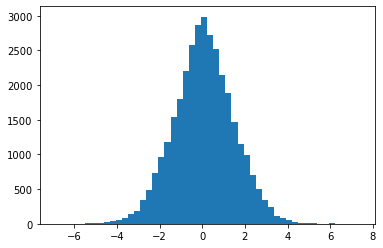

In [120]:
plt.hist(new_t, bins=50)

In [121]:
df_t = df_t.iloc[31:]
df_t['change'] = r_t
df_t['change_norm'] = new_t

In [122]:
df_t

,Time_UTC_Start,price,change,change_norm
Time_UTC_Start,,,,
2018-07-20 18:00:00,2018-07-20 18:00:00,7441.919665,-5.774569,-0.831896
2018-07-20 19:00:00,2018-07-20 19:00:00,7441.978099,0.058434,0.008451
2018-07-20 20:00:00,2018-07-20 20:00:00,7438.366275,-3.611824,-0.523313
2018-07-20 21:00:00,2018-07-20 21:00:00,7434.922567,-3.443708,-0.493838
2018-07-20 22:00:00,2018-07-20 22:00:00,7445.277904,10.355337,1.478259
...,...,...,...,...
2022-05-07 03:00:00,2022-05-07 03:00:00,36078.528267,-37.390584,-0.646692
2022-05-07 04:00:00,2022-05-07 04:00:00,36051.552969,-26.975297,-0.463454
2022-05-07 05:00:00,2022-05-07 05:00:00,36018.029721,-33.523248,-0.571754


In [123]:
df_r = pd.merge(df_feat, df_t, left_index=True, right_index=True)

In [124]:
df_lol = base_feat(df_t, base_cols=['change', 'change_norm'], time_delta=60, 
                                                              window_lookback=[1, 3, 6, 10, 60],
                                                              agg_func=['mean', 'median', 'var', 'max', 'min'])

{'mean_change_60M': 'mean', 'median_change_60M': 'median', 'var_change_60M': 'var', 'max_change_60M': 'max', 'min_change_60M': 'min'}
{'mean_change_180M': 'mean', 'median_change_180M': 'median', 'var_change_180M': 'var', 'max_change_180M': 'max', 'min_change_180M': 'min'}
{'mean_change_360M': 'mean', 'median_change_360M': 'median', 'var_change_360M': 'var', 'max_change_360M': 'max', 'min_change_360M': 'min'}
{'mean_change_600M': 'mean', 'median_change_600M': 'median', 'var_change_600M': 'var', 'max_change_600M': 'max', 'min_change_600M': 'min'}
{'mean_change_3600M': 'mean', 'median_change_3600M': 'median', 'var_change_3600M': 'var', 'max_change_3600M': 'max', 'min_change_3600M': 'min'}
{'mean_change_norm_60M': 'mean', 'median_change_norm_60M': 'median', 'var_change_norm_60M': 'var', 'max_change_norm_60M': 'max', 'min_change_norm_60M': 'min'}
{'mean_change_norm_180M': 'mean', 'median_change_norm_180M': 'median', 'var_change_norm_180M': 'var', 'max_change_norm_180M': 'max', 'min_change_n

In [125]:
df_lol = df_lol.drop(columns=['Time_UTC_Start', 'change', 'change_norm', 'price'])

In [126]:
df_lol

,mean_change_60M,median_change_60M,max_change_60M,min_change_60M,mean_change_180M,median_change_180M,var_change_180M,max_change_180M,min_change_180M,mean_change_360M,...,max_change_norm_360M,min_change_norm_360M,mean_change_norm_600M,median_change_norm_600M,max_change_norm_600M,min_change_norm_600M,mean_change_norm_3600M,median_change_norm_3600M,max_change_norm_3600M,min_change_norm_3600M
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-23 06:00:00,0.670919,0.670919,0.670919,0.670919,-2.356377,0.670919,62.315957,3.575953,-11.316001,-1.124691,...,0.517196,-1.636758,0.372156,0.215577,2.789453,-1.636758,0.056801,0.111624,2.789453,-2.866713
2018-07-23 07:00:00,17.624931,17.624931,17.624931,17.624931,7.290601,3.575953,82.208596,17.624931,0.670919,2.025651,...,2.586684,-1.636758,0.564600,0.215577,2.789453,-1.636758,0.113778,0.127110,2.789453,-2.866713
2018-07-23 08:00:00,15.067864,15.067864,15.067864,15.067864,11.121238,15.067864,83.541529,17.624931,0.670919,4.414337,...,2.586684,-1.636758,0.683435,0.215577,2.789453,-1.636758,0.149033,0.150867,2.789453,-2.866713
2018-07-23 09:00:00,21.262924,21.262924,21.262924,21.262924,17.985240,17.624931,9.692059,21.262924,15.067864,7.814432,...,2.752056,-1.636758,0.679695,0.215577,2.752056,-1.636758,0.203622,0.194689,2.789453,-2.866713
2018-07-23 10:00:00,5.661368,5.661368,5.661368,5.661368,13.997385,15.067864,61.711584,21.262924,5.661368,10.643993,...,2.752056,0.105850,0.723542,0.327009,2.752056,-1.636758,0.224066,0.238852,2.789453,-2.866713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:00:00,-17.429520,-17.429520,-17.429520,-17.429520,-17.771964,-17.429520,2.914479,-16.261958,-19.624414,-15.450508,...,-0.089704,-0.362332,-0.365660,-0.324344,-0.089704,-0.775160,-0.189834,-0.348254,2.824786,-2.357513
2022-05-07 04:00:00,-37.390584,-37.390584,-37.390584,-37.390584,-23.694021,-17.429520,141.037695,-16.261958,-37.390584,-18.890717,...,-0.089704,-0.646692,-0.352813,-0.324344,-0.089704,-0.726631,-0.212219,-0.355492,2.824786,-2.357513
2022-05-07 05:00:00,-26.975297,-26.975297,-26.975297,-26.975297,-27.265134,-26.975297,99.674029,-17.429520,-37.390584,-22.638392,...,-0.288861,-0.646692,-0.326495,-0.324344,-0.089704,-0.646692,-0.243969,-0.412893,2.824786,-2.357513


In [148]:
X, y = pd.concat([df_r[feat], df_lol.iloc[+225:]], axis=1).dropna(), df_r.iloc[139:]['change']
X_train_t, X_valid_t, X_test_t = X[:int(X.shape[0]*0.6)], X[int(X.shape[0]*0.6):int(X.shape[0]*0.8)], X[int(X.shape[0]*0.8):]
y_train_t, y_valid_t, y_test_t = y[:int(X.shape[0]*0.6)], y[int(X.shape[0]*0.6):int(X.shape[0]*0.8)], y[int(X.shape[0]*0.8):]

In [149]:
X.columns.tolist()

['min_Quote_asset_volume_60M',
 'max_Quote_asset_volume_60M',
 'mean_Quote_asset_volume_60M',
 'median_Quote_asset_volume_60M',
 'min_Quote_asset_volume_300M',
 'max_Quote_asset_volume_300M',
 'mean_Quote_asset_volume_300M',
 'median_Quote_asset_volume_300M',
 'var_Quote_asset_volume_300M',
 'min_Quote_asset_volume_600M',
 'max_Quote_asset_volume_600M',
 'mean_Quote_asset_volume_600M',
 'median_Quote_asset_volume_600M',
 'min_Quote_asset_volume_3600M',
 'max_Quote_asset_volume_3600M',
 'mean_Quote_asset_volume_3600M',
 'median_Quote_asset_volume_3600M',
 'min_Quote_asset_volume_12000M',
 'max_Quote_asset_volume_12000M',
 'mean_Quote_asset_volume_12000M',
 'median_Quote_asset_volume_12000M',
 'var_Quote_asset_volume_12000M',
 'min_Number_of_trades_60M',
 'max_Number_of_trades_60M',
 'mean_Number_of_trades_60M',
 'median_Number_of_trades_60M',
 'min_Number_of_trades_300M',
 'max_Number_of_trades_300M',
 'mean_Number_of_trades_300M',
 'median_Number_of_trades_300M',
 'var_Number_of_trades

In [150]:
linear_r = Ridge(alpha=0.3)

In [151]:
linear_r.fit(X_train_t, y_train_t)

Ridge(alpha=0.3)

In [152]:
y_train_pred_t, y_valid_pred_t, y_test_pred_t = take_the_error(linear_r, [X_train_t, y_train_t], [X_valid_t, y_valid_t], [X_test_t, y_test_t])

Train error is: MSE= 45.29275484700414, RMSE=6.729989215964921, MAPE=2.5535533092755935, ACC=0.7766743060860708
Valid error is: MSE= 747.9555840183064, RMSE=27.348776645735114, MAPE=2.892821837488759, ACC=0.894270435446906
Test error is: MSE= 355.0478837416811, RMSE=18.842714341136766, MAPE=3.1440152502743626, ACC=0.8988540870893812


In [154]:
y_test_t

Time_UTC_Start
2021-08-06 23:00:00     73.149755
2021-08-07 00:00:00     75.681211
2021-08-07 01:00:00    100.644501
2021-08-07 02:00:00    116.390272
2021-08-07 03:00:00     99.843791
                          ...    
2022-05-07 03:00:00    -37.390584
2022-05-07 04:00:00    -26.975297
2022-05-07 05:00:00    -33.523248
2022-05-07 06:00:00    -18.871944
2022-05-07 07:00:00    -21.645053
Name: change, Length: 6545, dtype: float64

In [155]:
test = df_t['price'].shift(1)[-6545:] + y_test_pred_t

In [156]:
df_t['price']

Time_UTC_Start
2018-07-20 18:00:00     7441.919665
2018-07-20 19:00:00     7441.978099
2018-07-20 20:00:00     7438.366275
2018-07-20 21:00:00     7434.922567
2018-07-20 22:00:00     7445.277904
                           ...     
2022-05-07 03:00:00    36078.528267
2022-05-07 04:00:00    36051.552969
2022-05-07 05:00:00    36018.029721
2022-05-07 06:00:00    35999.157778
2022-05-07 07:00:00    35977.512725
Name: price, Length: 33278, dtype: float64

In [157]:
df_t['price'].shift(1)

Time_UTC_Start
2018-07-20 18:00:00             NaN
2018-07-20 19:00:00     7441.919665
2018-07-20 20:00:00     7441.978099
2018-07-20 21:00:00     7438.366275
2018-07-20 22:00:00     7434.922567
                           ...     
2022-05-07 03:00:00    36115.918851
2022-05-07 04:00:00    36078.528267
2022-05-07 05:00:00    36051.552969
2022-05-07 06:00:00    36018.029721
2022-05-07 07:00:00    35999.157778
Name: price, Length: 33278, dtype: float64

In [159]:
y_test_t + df_t['price'].shift(1)[-6545:]

Time_UTC_Start
2021-08-06 23:00:00             NaN
2021-08-07 00:00:00             NaN
2021-08-07 01:00:00             NaN
2021-08-07 02:00:00             NaN
2021-08-07 03:00:00             NaN
                           ...     
2022-05-07 03:00:00    36078.528267
2022-05-07 04:00:00    36051.552969
2022-05-07 05:00:00    36018.029721
2022-05-07 06:00:00    35999.157778
2022-05-07 07:00:00    35977.512725
Length: 6561, dtype: float64

In [161]:
df_t['price'][-6545:]

Time_UTC_Start
2021-08-07 15:00:00    43111.469796
2021-08-07 16:00:00    43177.075821
2021-08-07 17:00:00    43197.676526
2021-08-07 18:00:00    43227.406540
2021-08-07 19:00:00    43260.243099
                           ...     
2022-05-07 03:00:00    36078.528267
2022-05-07 04:00:00    36051.552969
2022-05-07 05:00:00    36018.029721
2022-05-07 06:00:00    35999.157778
2022-05-07 07:00:00    35977.512725
Name: price, Length: 6545, dtype: float64

In [162]:
(df_t['price'].shift(1)[-6545:] + y_test_pred_t)

Time_UTC_Start
2021-08-07 15:00:00    43104.760954
2021-08-07 16:00:00    43194.925036
2021-08-07 17:00:00    43263.231531
2021-08-07 18:00:00    43297.579548
2021-08-07 19:00:00    43330.363132
                           ...     
2022-05-07 03:00:00    36092.519982
2022-05-07 04:00:00    36039.260807
2022-05-07 05:00:00    36011.976549
2022-05-07 06:00:00    35979.092039
2022-05-07 07:00:00    35965.742369
Name: price, Length: 6545, dtype: float64

In [163]:
df_t['price'][-6545:]

Time_UTC_Start
2021-08-07 15:00:00    43111.469796
2021-08-07 16:00:00    43177.075821
2021-08-07 17:00:00    43197.676526
2021-08-07 18:00:00    43227.406540
2021-08-07 19:00:00    43260.243099
                           ...     
2022-05-07 03:00:00    36078.528267
2022-05-07 04:00:00    36051.552969
2022-05-07 05:00:00    36018.029721
2022-05-07 06:00:00    35999.157778
2022-05-07 07:00:00    35977.512725
Name: price, Length: 6545, dtype: float64

In [165]:
import random
random.randint(0, 6545)

207

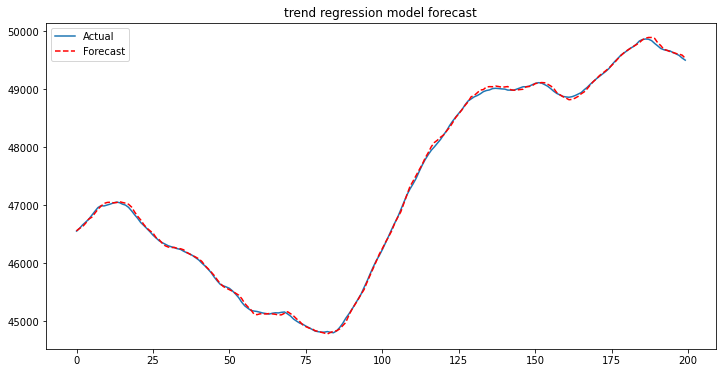

In [166]:
plt.figure(figsize=(12, 6))
plt.plot(df_t['price'][-6545:].tolist()[207:407], label='Actual')
plt.plot(test.tolist()[207:407], color='red', linestyle='--', label = 'Forecast')
plt.legend()
plt.title('trend regression model forecast')
plt.show()

In [171]:
y_test_t

Time_UTC_Start
2021-08-06 23:00:00     73.149755
2021-08-07 00:00:00     75.681211
2021-08-07 01:00:00    100.644501
2021-08-07 02:00:00    116.390272
2021-08-07 03:00:00     99.843791
                          ...    
2022-05-07 03:00:00    -37.390584
2022-05-07 04:00:00    -26.975297
2022-05-07 05:00:00    -33.523248
2022-05-07 06:00:00    -18.871944
2022-05-07 07:00:00    -21.645053
Name: change, Length: 6545, dtype: float64

In [173]:
len(y_test_pred_t)

6545

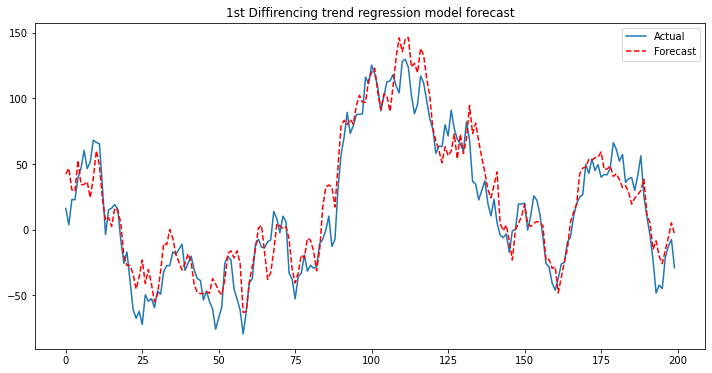

In [168]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_t.tolist()[207:407], label='Actual')
plt.plot(y_test_pred_t.tolist()[207:407], color='red', linestyle='--', label = 'Forecast')
plt.legend()
plt.title('1st Diffirencing trend regression model forecast')
plt.show()

In [174]:
true = df_t['price'][-6545:].tolist() + y_test_r

ValueError: operands could not be broadcast together with shapes (6545,) (6548,) 

In [175]:
y_test_r

Time_UTC_Start
2021-08-06 20:00:00    1773.311433
2021-08-06 21:00:00    1461.499725
2021-08-06 22:00:00    1384.295013
2021-08-06 23:00:00    1390.955258
2021-08-07 00:00:00    1405.114047
                          ...     
2022-05-07 03:00:00    -167.548267
2022-05-07 04:00:00    -251.562969
2022-05-07 05:00:00    -205.419721
2022-05-07 06:00:00    -149.147778
2022-05-07 07:00:00    -167.502725
Name: resid, Length: 6548, dtype: float64

In [177]:
df_t['price'][-6545:]

Time_UTC_Start
2021-08-07 15:00:00    43111.469796
2021-08-07 16:00:00    43177.075821
2021-08-07 17:00:00    43197.676526
2021-08-07 18:00:00    43227.406540
2021-08-07 19:00:00    43260.243099
                           ...     
2022-05-07 03:00:00    36078.528267
2022-05-07 04:00:00    36051.552969
2022-05-07 05:00:00    36018.029721
2022-05-07 06:00:00    35999.157778
2022-05-07 07:00:00    35977.512725
Name: price, Length: 6545, dtype: float64

In [231]:
true

Time_UTC_Start
2022-01-03 18:00:00    46610.51
2022-01-03 19:00:00    46495.90
2022-01-03 20:00:00    46295.34
2022-01-03 21:00:00    45820.01
2022-01-03 22:00:00    46113.93
                         ...   
2022-05-07 03:00:00    35910.98
2022-05-07 04:00:00    35799.99
2022-05-07 05:00:00    35812.61
2022-05-07 06:00:00    35850.01
2022-05-07 07:00:00    35810.01
Name: resid, Length: 2966, dtype: float64

In [229]:
pred = test + y_test_pred_r

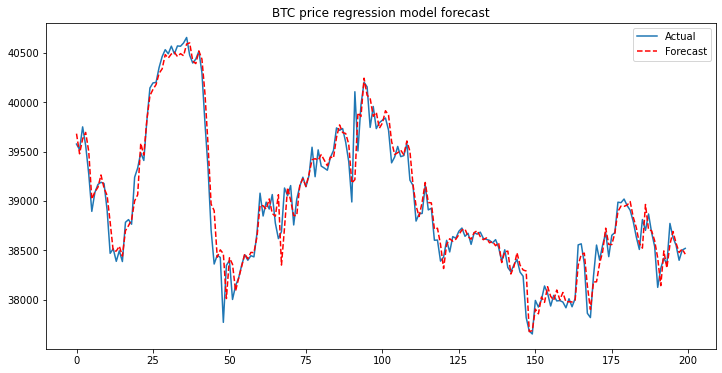

In [234]:
plt.figure(figsize=(12, 6))
plt.plot(true.tolist()[-300:-100], label='Actual')
plt.plot(pred.tolist()[-300:-100], color='red', linestyle='--', label = 'Forecast')
plt.legend()
plt.title('BTC price regression model forecast')
plt.show()

In [236]:
dif_true = (true - true.shift(1)).dropna()
dif_pred = (pred - true.shift(1)).dropna()
(dif_true * dif_pred >= 0).sum()

2325

## Test

In [276]:
true = df_t['price'][-2966:] + y_test_r
pred = df_t['price'][-2967:].shift(1).dropna() + y_test_pred_t + y_test_pred_r

In [278]:
dif_true = (true - true.shift(1)).dropna()
dif_pred = (pred - true.shift(1)).dropna()
(dif_true * dif_pred >= 0).sum()/2965

0.7841483979763912

## Train

In [279]:
true = (df_t['price'] + y_train_r).dropna()
pred = df_t['price'][21331:5932+21332].shift(1).dropna() + y_train_pred_t + y_train_pred_r

In [281]:
dif_true = (true - true.shift(1)).dropna()
dif_pred = (pred - true.shift(1)).dropna()
(dif_true * dif_pred >= 0).sum()/5932

0.5583277140930546

## Valid

In [291]:
true = (df_t['price'] + y_valid_r).dropna()
pred = df_t['price'][27341:4152+27342].shift(1).dropna() + y_valid_pred_t + y_valid_pred_r

In [292]:
dif_true = (true - true.shift(1)).dropna()
dif_pred = (pred - true.shift(1)).dropna()
(dif_true * dif_pred >= 0).sum()/4152

0.6425818882466281

In [282]:
y_valid

Time_UTC_Start
2021-09-02 00:00:00     65.900795
2021-09-02 01:00:00     82.377417
2021-09-02 02:00:00    104.639855
2021-09-02 03:00:00    102.217332
2021-09-02 04:00:00     98.968869
                          ...    
2022-02-21 23:00:00    -41.504829
2022-02-22 00:00:00    -53.703372
2022-02-22 01:00:00    -69.013624
2022-02-22 02:00:00    -86.390770
2022-02-22 03:00:00   -118.134334
Name: change, Length: 4152, dtype: float64

In [297]:
X.shape[0] * 0.5

5932.0

## model for the stacking residual + (trend, seasonal)

In [71]:
resid['label_r'] = (resid['resid'] >= 0) * 1

In [72]:
resid

,Time_UTC_Start,resid,label_r
Time_UTC_Start,,,
2018-07-19 10:39:00,2018-07-19 10:39:00,20.399253,1
2018-07-19 11:39:00,2018-07-19 11:39:00,44.687776,1
2018-07-19 12:39:00,2018-07-19 12:39:00,58.912020,1
2018-07-19 13:39:00,2018-07-19 13:39:00,119.046409,1
2018-07-19 14:39:00,2018-07-19 14:39:00,101.936594,1
...,...,...,...
2022-05-07 03:39:00,2022-05-07 03:39:00,-175.444066,0
2022-05-07 04:39:00,2022-05-07 04:39:00,-220.661329,0
2022-05-07 05:39:00,2022-05-07 05:39:00,-158.834902,0


In [74]:
df_feat = pd.merge(df_feat, resid, left_index=True, right_index=True)

In [75]:
df_feat

,new_label,Open,High,Low,Close,Volumn,Quote_asset_volume,Number_of_trades,Taker_buy_base_asset_volume,Taker_buy_quote_asset_volume,...,min_Close_change_12000M,max_Close_change_12000M,mean_Close_change_12000M,median_Close_change_12000M,var_Close_change_12000M,y_t_pred,y_r_pred,Time_UTC_Start,resid,label_r
Time_UTC_Start,,,,,,,,,,,,,,,,,,,,,
2018-07-27 20:39:00,0,8228.62,8260.00,8222.54,8256.42,1015.505793,8.368948e+06,5782.0,570.572346,4.703229e+06,...,0.500770,-0.506449,0.194954,-0.171609,-0.559920,1,1,2018-07-27 20:39:00,258.691626,1
2018-07-27 21:39:00,1,8257.98,8277.20,8219.00,8238.99,1076.576098,8.880155e+06,6065.0,478.312950,3.946316e+06,...,0.500770,-0.506449,0.187139,-0.171609,-0.560023,1,1,2018-07-27 21:39:00,246.609237,1
2018-07-27 22:39:00,1,8238.93,8270.01,8128.00,8156.55,2031.897711,1.667219e+07,10383.0,1031.645856,8.473353e+06,...,0.500770,-0.506449,0.186442,-0.171609,-0.560018,1,1,2018-07-27 22:39:00,235.433861,1
2018-07-27 23:39:00,1,8156.55,8225.30,8130.00,8176.51,1440.677019,1.178337e+07,8100.0,861.710855,7.048050e+06,...,0.500770,-0.506449,0.181376,-0.171609,-0.559879,1,1,2018-07-27 23:39:00,124.072695,1
2018-07-28 00:39:00,1,8176.51,8195.89,8156.51,8183.27,978.116916,7.998172e+06,5798.0,607.850376,4.970403e+06,...,0.500770,-0.506449,0.183698,-0.171609,-0.559869,1,1,2018-07-28 00:39:00,126.003859,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-07 03:39:00,0,35823.05,35895.61,35755.85,35814.49,970.311790,3.476291e+07,23856.0,482.353610,1.727962e+07,...,-0.675009,0.487015,-1.392658,-1.076026,-0.032465,0,1,2022-05-07 03:39:00,-175.444066,0
2022-05-07 04:39:00,0,35814.49,35897.44,35722.24,35821.68,989.732570,3.544653e+07,24154.0,445.450930,1.595071e+07,...,-0.675009,0.487015,-1.393799,-1.076026,-0.032471,0,1,2022-05-07 04:39:00,-220.661329,0
2022-05-07 05:39:00,0,35821.69,35909.75,35794.31,35858.19,814.217850,2.919114e+07,22472.0,409.742390,1.468973e+07,...,-0.675009,0.487015,-1.326546,-0.967306,-0.034316,0,1,2022-05-07 05:39:00,-158.834902,0


In [130]:
df_lol = base_feat(df_feat, base_cols=['new_label', 'label_r'], time_delta=60, 
                                                              window_lookback=[1, 5, 10, 60, 200],
                                                              agg_func=['mean', 'median', 'var'])

{'mean_new_label_60M': 'mean', 'median_new_label_60M': 'median', 'var_new_label_60M': 'var'}
{'mean_new_label_300M': 'mean', 'median_new_label_300M': 'median', 'var_new_label_300M': 'var'}
{'mean_new_label_600M': 'mean', 'median_new_label_600M': 'median', 'var_new_label_600M': 'var'}
{'mean_new_label_3600M': 'mean', 'median_new_label_3600M': 'median', 'var_new_label_3600M': 'var'}
{'mean_new_label_12000M': 'mean', 'median_new_label_12000M': 'median', 'var_new_label_12000M': 'var'}
{'mean_label_r_60M': 'mean', 'median_label_r_60M': 'median', 'var_label_r_60M': 'var'}
{'mean_label_r_300M': 'mean', 'median_label_r_300M': 'median', 'var_label_r_300M': 'var'}
{'mean_label_r_600M': 'mean', 'median_label_r_600M': 'median', 'var_label_r_600M': 'var'}
{'mean_label_r_3600M': 'mean', 'median_label_r_3600M': 'median', 'var_label_r_3600M': 'var'}
{'mean_label_r_12000M': 'mean', 'median_label_r_12000M': 'median', 'var_label_r_12000M': 'var'}


In [143]:
cols = df_lol.columns[218:]

In [145]:
X, y = df_lol[cols], df_lol['label']
X_train, X_valid, X_test = X[:int(df_feat.shape[0]*0.7)], X[int(df_feat.shape[0]*0.7):int(df_feat.shape[0]*0.85)], X[int(df_feat.shape[0]*0.85):]
y_train, y_valid, y_test = y[:int(df_feat.shape[0]*0.7)], y[int(df_feat.shape[0]*0.7):int(df_feat.shape[0]*0.85)], y[int(df_feat.shape[0]*0.85):]

In [146]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True, intercept_scaling=3, class_weight=None, random_state=1234, solver='lbfgs', max_iter=1000, multi_class='auto', verbose=1)

In [147]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1, intercept_scaling=3, max_iter=1000, random_state=1234,
                   verbose=1)

In [148]:
clf.score(X_train, y_train)

0.5208641867758516

In [149]:
y_pred = clf.predict_proba(X_test)

In [157]:
y_pred

array([[0.42327757, 0.57672243],
       [0.4338442 , 0.5661558 ],
       [0.44876974, 0.55123026],
       ...,
       [0.49623008, 0.50376992],
       [0.495271  , 0.504729  ],
       [0.4943052 , 0.5056948 ]])

(array([  1.,   7.,  36.,  88., 209., 264., 411., 652., 681., 723., 598.,
        408., 230., 184., 120.,  64.,  31.,   8.,   3.,   2.]),
 array([0.43775303, 0.44625238, 0.45475174, 0.46325109, 0.47175044,
        0.4802498 , 0.48874915, 0.4972485 , 0.50574786, 0.51424721,
        0.52274656, 0.53124592, 0.53974527, 0.54824462, 0.55674398,
        0.56524333, 0.57374268, 0.58224204, 0.59074139, 0.59924074,
        0.6077401 ]),
 <BarContainer object of 20 artists>)

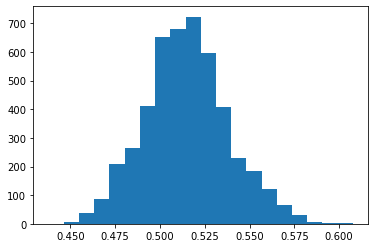

In [158]:
plt.hist(y_pred[:, 1], bins=20)

In [154]:
params = {'objective': 'binary',
                      'metric': ['auc'],
                      'boosting':'gbdt',
                      'num_boost_round':1000,
                      'early_stopping_rounds':10,
                      'learning_rate': 0.1,
                      'max_depth': 3,
                      'num_leaves': 8,
                      'feature_fraction': 0.8,
#                       'bagging_fraction': 0.8,
#                       'min_data_in_leaf': 10,
                      'verbosity': 1}

In [155]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference=train_data)

In [156]:
model_3 = lgb.train(params, train_data,                     
                  valid_sets=[train_data, valid_data],
                  valid_names=['train', 'valid'])

[LightGBM] [Info] Number of positive: 11787, number of negative: 11171
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 22958, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513416 -> initscore=0.053676
[LightGBM] [Info] Start training from score 0.053676
[1]	train's auc: 0.52446	valid's auc: 0.511986
Training until validation scores don't improve for 10 rounds
[2]	train's auc: 0.53586	valid's auc: 0.50973
[3]	train's auc: 0.537696	valid's auc: 0.507439
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	train's auc: 0.537362	valid's auc: 0.511305
[5]	train's auc: 0.537987	valid's auc: 0.51189
[6]	train's auc: 0.540626	valid's auc: 0.508326
[7]	train's auc: 0.541

## the last evaluation

In [179]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)

In [180]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

In [181]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [73]:
import random

In [77]:
random.randint(1, 7)

6